<a href="https://colab.research.google.com/github/pinballsurgeon/sweeping_analysis/blob/main/protein_tfidf_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import networkx as nx

n_samples = 2000
n_features = 1000
n_components = 5
n_top_words = 10

ngram_ranges = [9, 8, 7, 6, 5, 4, 3, 2, 1]

# df = pd.read_csv("proteins_lhc.csv",)
df = pd.read_csv("protein_lhc_deep.csv",)


In [2]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    buf_df=pd.DataFrame()
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]


        # build resulting dataframe
        topic_df_name = f"Topic_{topic_idx +1}"
        buf_df[f"{topic_df_name}_node"] = top_features
        buf_df[f"{topic_df_name}_weight"] = weights


        # build horizontal bar chart per topic
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

    return buf_df

In [3]:
def build_graph_network(df_slice):

  import networkx as nx
  from networkx.algorithms.community.modularity_max import greedy_modularity_communities

  # build graph 
  G = nx.from_pandas_edgelist(df_slice
                            ,'source'          # parent
                            ,'target'          # child
                            , ['weight'])      # relationship


  # define plot area
  plt.figure(3,figsize=(22,22)) 

  # calc degrees per node
  d = dict(G.degree)

  # visualize graph 
  nx.draw(G         
      ,nx.kamada_kawai_layout(G)               
      ,with_labels=True
      ,edge_color='gray'
      ,node_color='lightskyblue'
      ,node_size=[v * 100 for v in d.values()]
      ,font_size=22)
  
  ax = plt.gca() # to get the current axis
  ax.collections[0].set_edgecolor("blue")

  return G

In [4]:
buf_list = []

for seq in df['protein']:
  buf_string = ''
  for amino in seq:
    buf_string = buf_string + amino + ' '
  buf_list.append(buf_string)
df['protein split'] = buf_list

In [5]:
# demonstrate amino acid split
df['protein split']

0     M P R S Q R N D N F I D K T F T V I A D L I L ...
1     M P R S R I N G N F I D K T S S I V A N I L L ...
2     M P R S R I N E N F I D K T F S I V A N I L L ...
3     M P R S R I N G N F I D K T F S I V A N I L L ...
4     M P R S R I N G N F I D K T F S I V A N I L L ...
5     M P R S R I N G N F I D K T F T I V A D I L L ...
6     M S N F I D K T F T V I A D I L L K V L P A S ...
7     M P R S Q K N D N F I D K T F T V L A D I V L ...
8     M P R S Q R N D N F I D K T F T I V A D I L L ...
9     M P R S G G I N G N F I D K T F S I V A N I L ...
10    M P R S R I N G N F I D K T F T I V A D I L L ...
11    M P R S Q R N D N F I D K T F T L V A D T S L ...
12    M P R S Q K N D N F I D K T F T I V A D I L L ...
13    M P R N Q R N D N F I D K S F T V M A D M I L ...
14    M S Q K N D N F I D K T F T V L A D I L L K V ...
15    M P R S R I N G N F I D K T F S I V A N I L L ...
16    M P R L Q K N D N F I D K T F T V L A D I I L ...
17    M P R S R I N G N F I D K T F S I V A N I 




amino acid ngram range of study - (9, 9)
Extracting tf-idf features for NMF...
done in 0.025s.
Extracting tf features for LDA...
done in 0.007s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.173s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


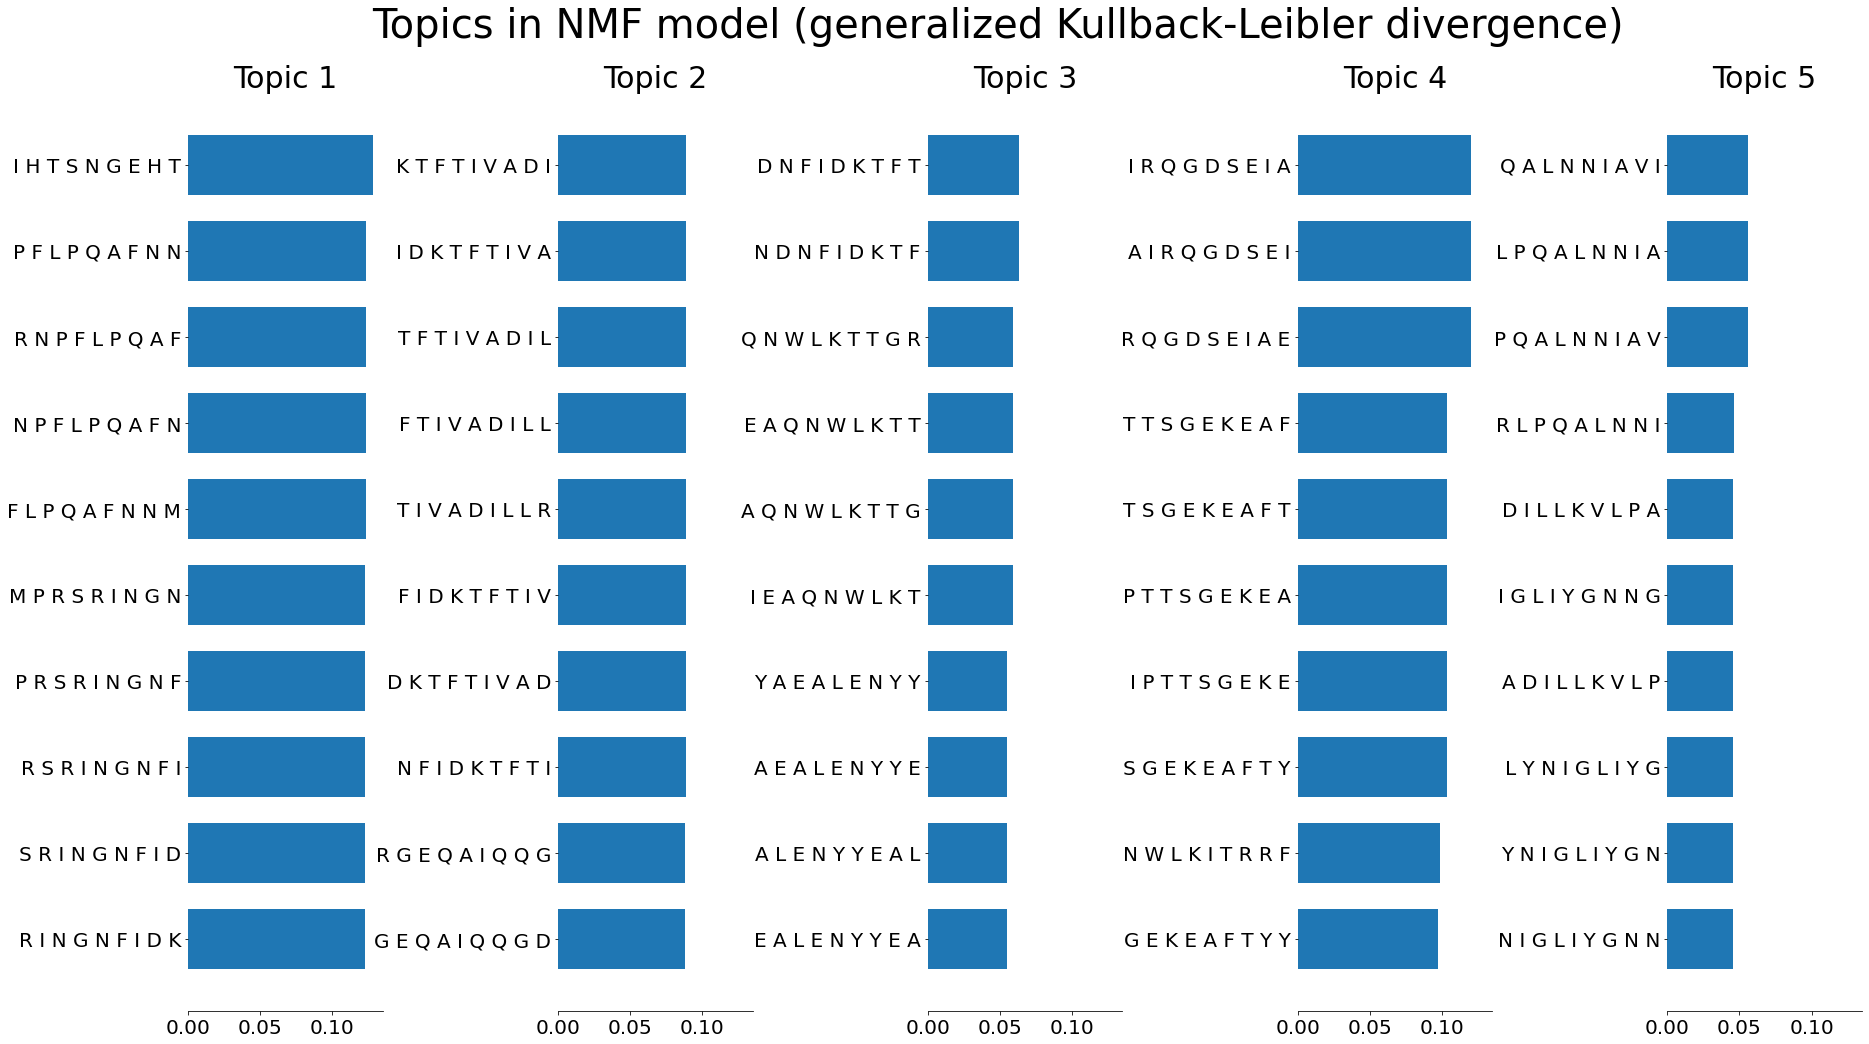



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


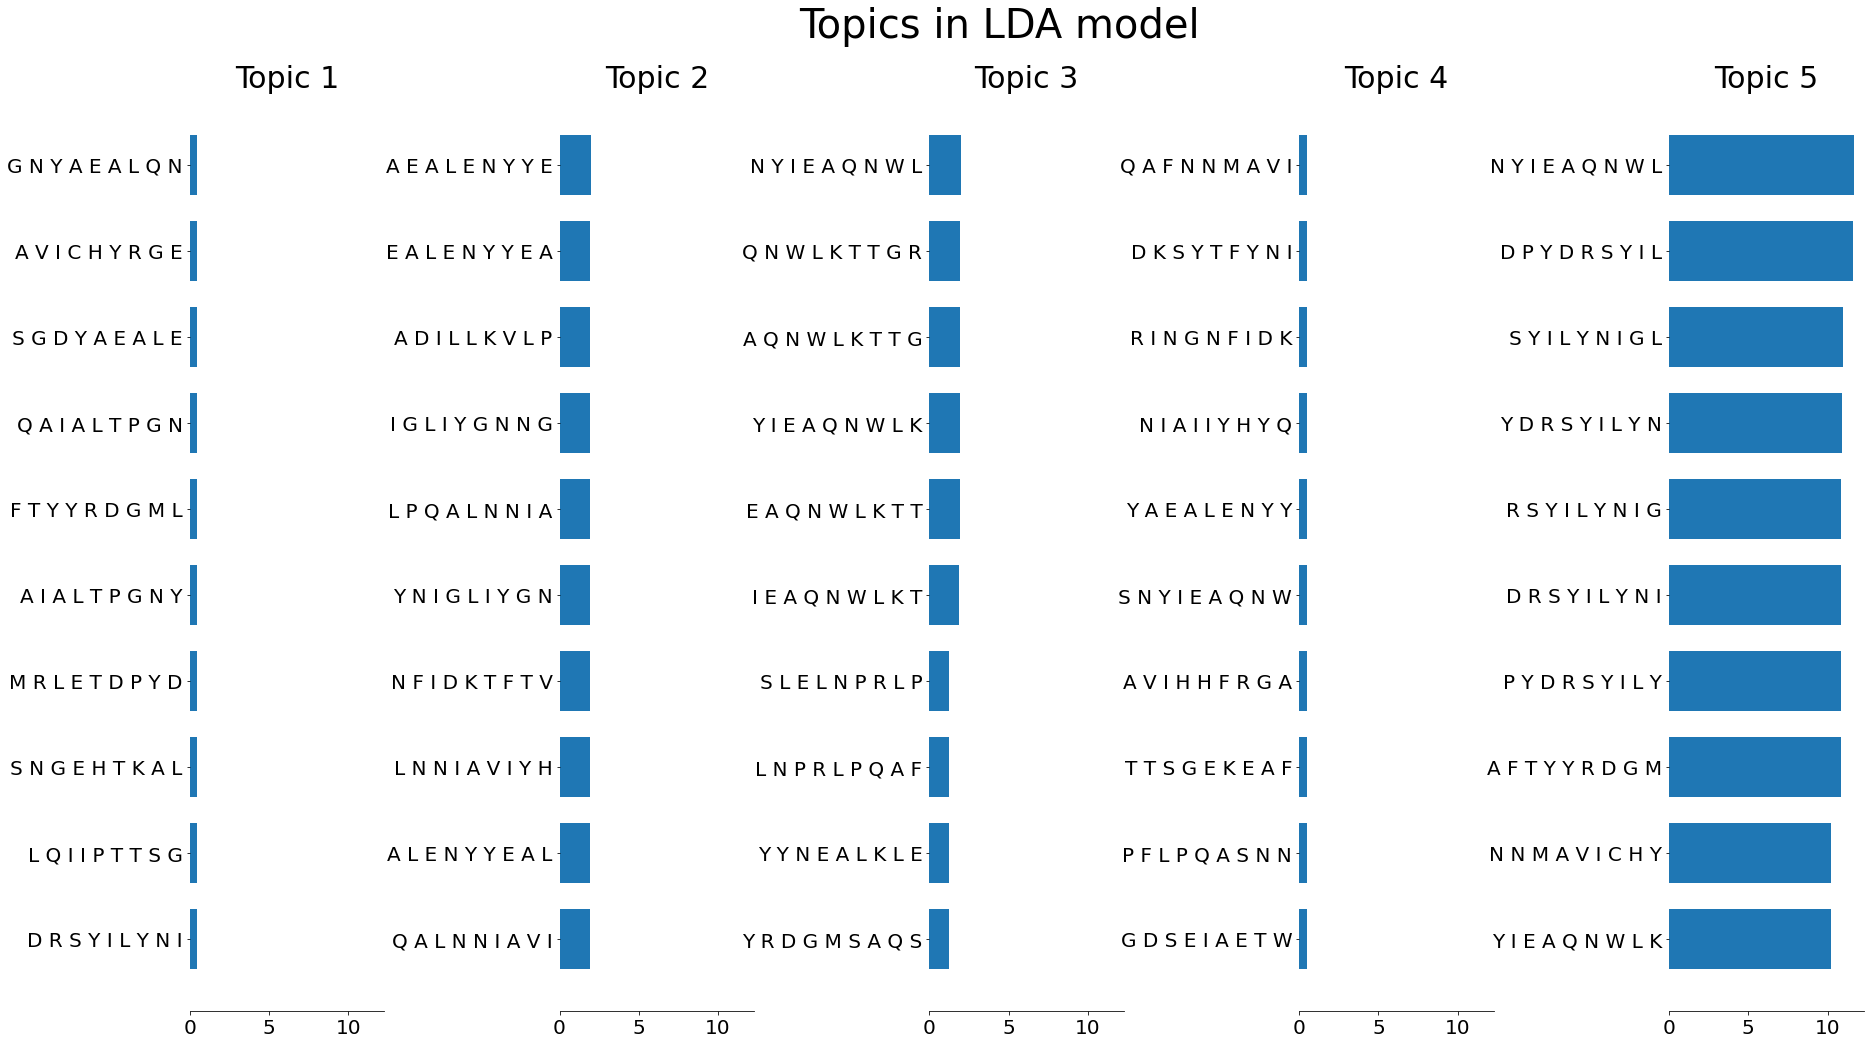




amino acid ngram range of study - (8, 8)
Extracting tf-idf features for NMF...
done in 0.016s.
Extracting tf features for LDA...
done in 0.011s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.096s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


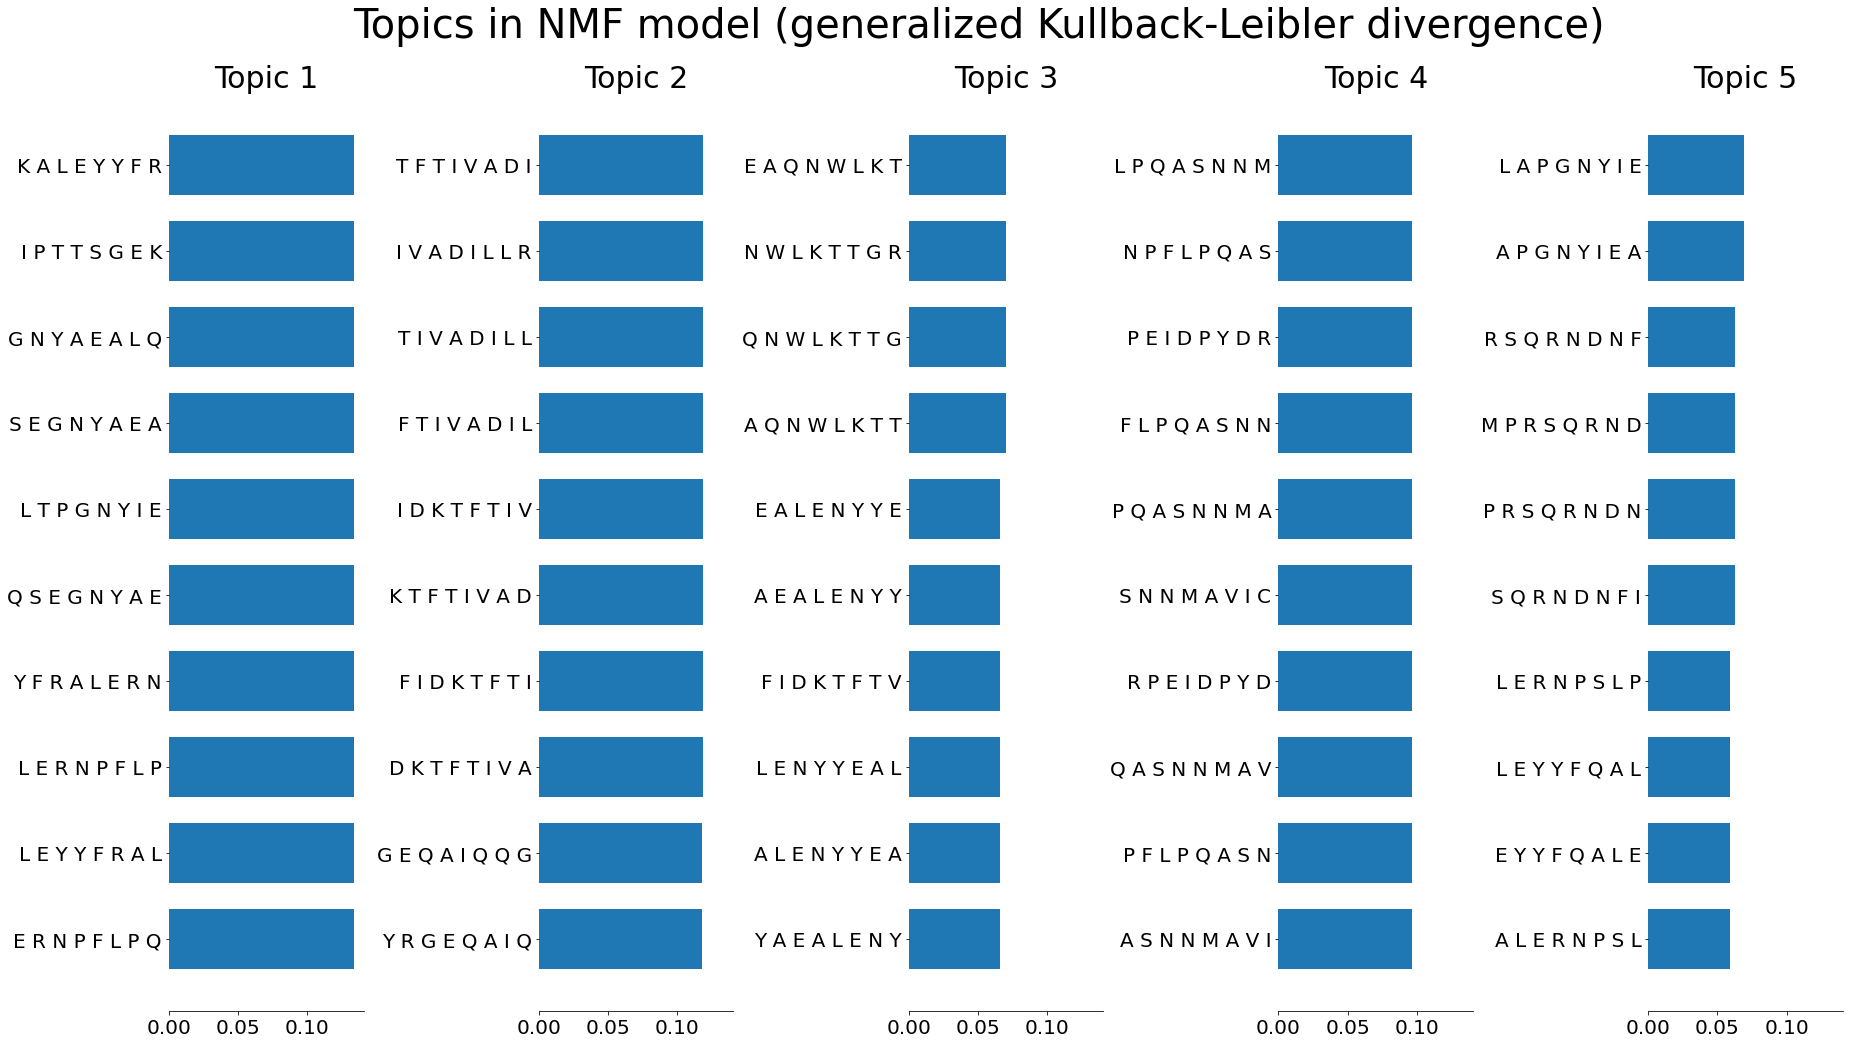



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


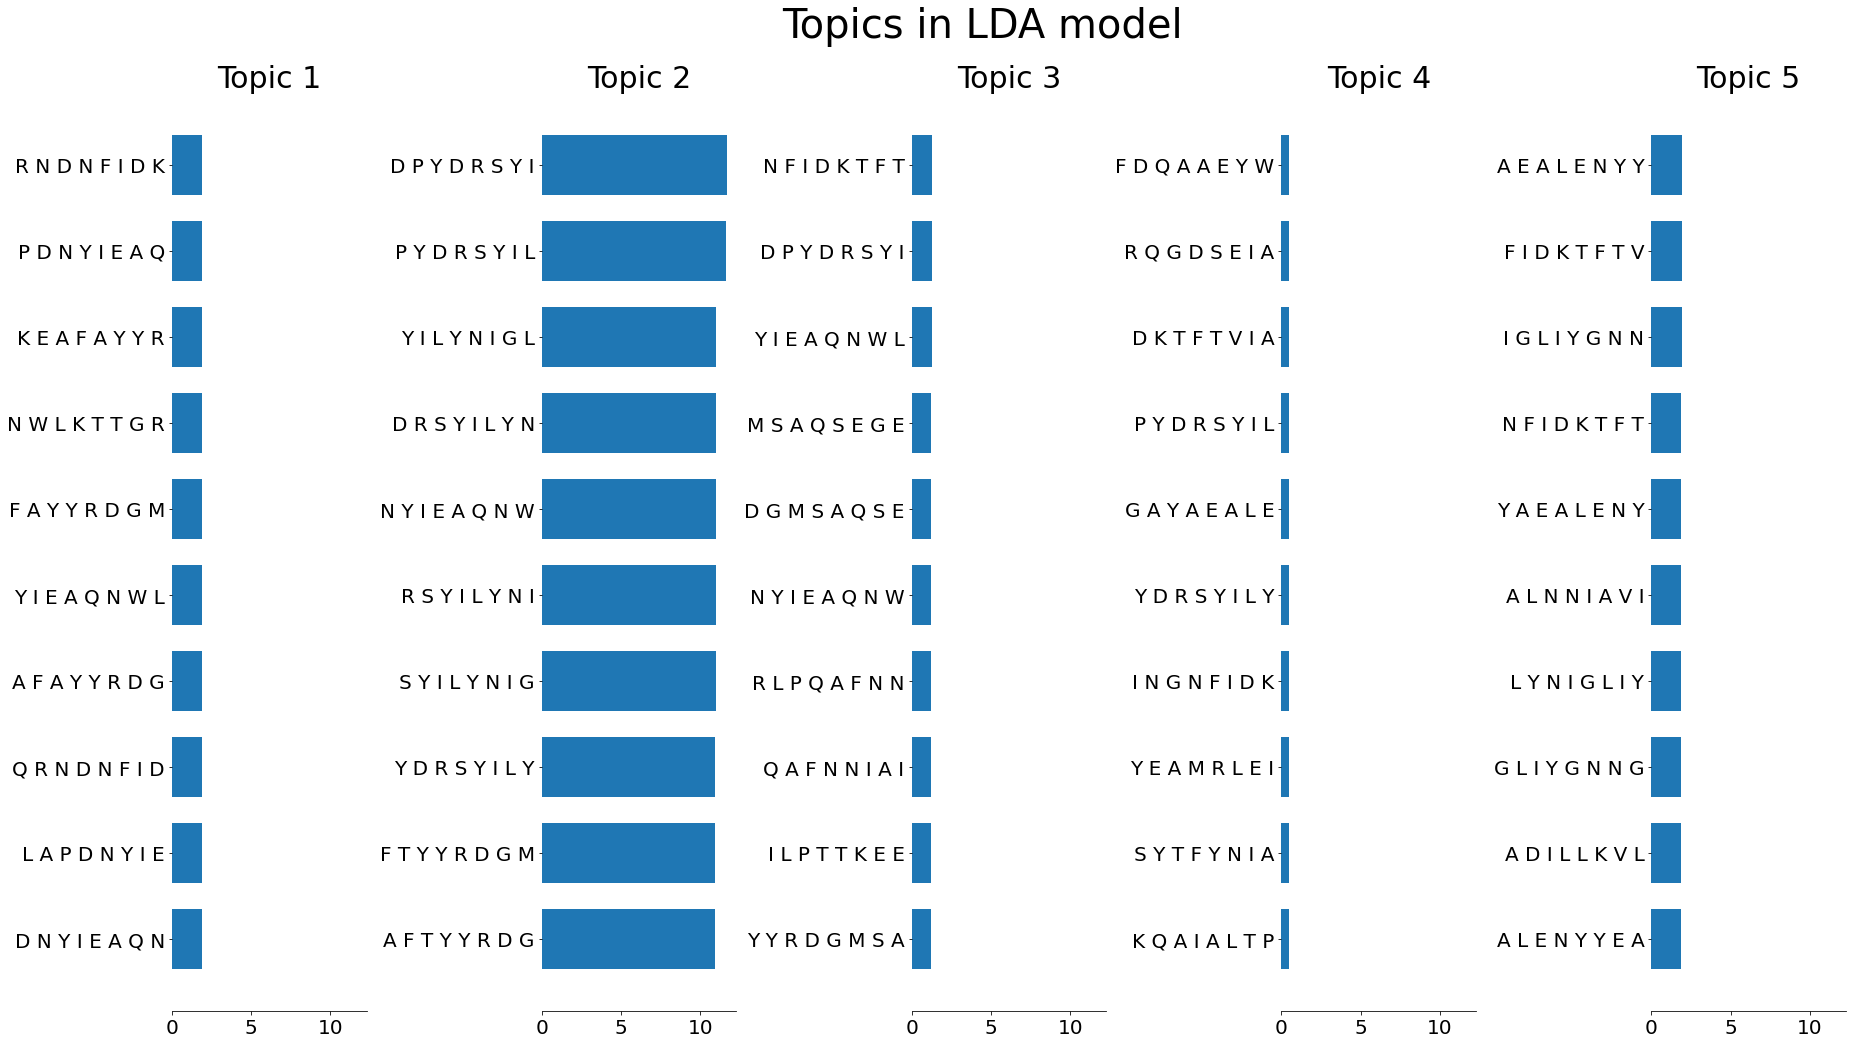




amino acid ngram range of study - (7, 7)
Extracting tf-idf features for NMF...
done in 0.012s.
Extracting tf features for LDA...
done in 0.009s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.096s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


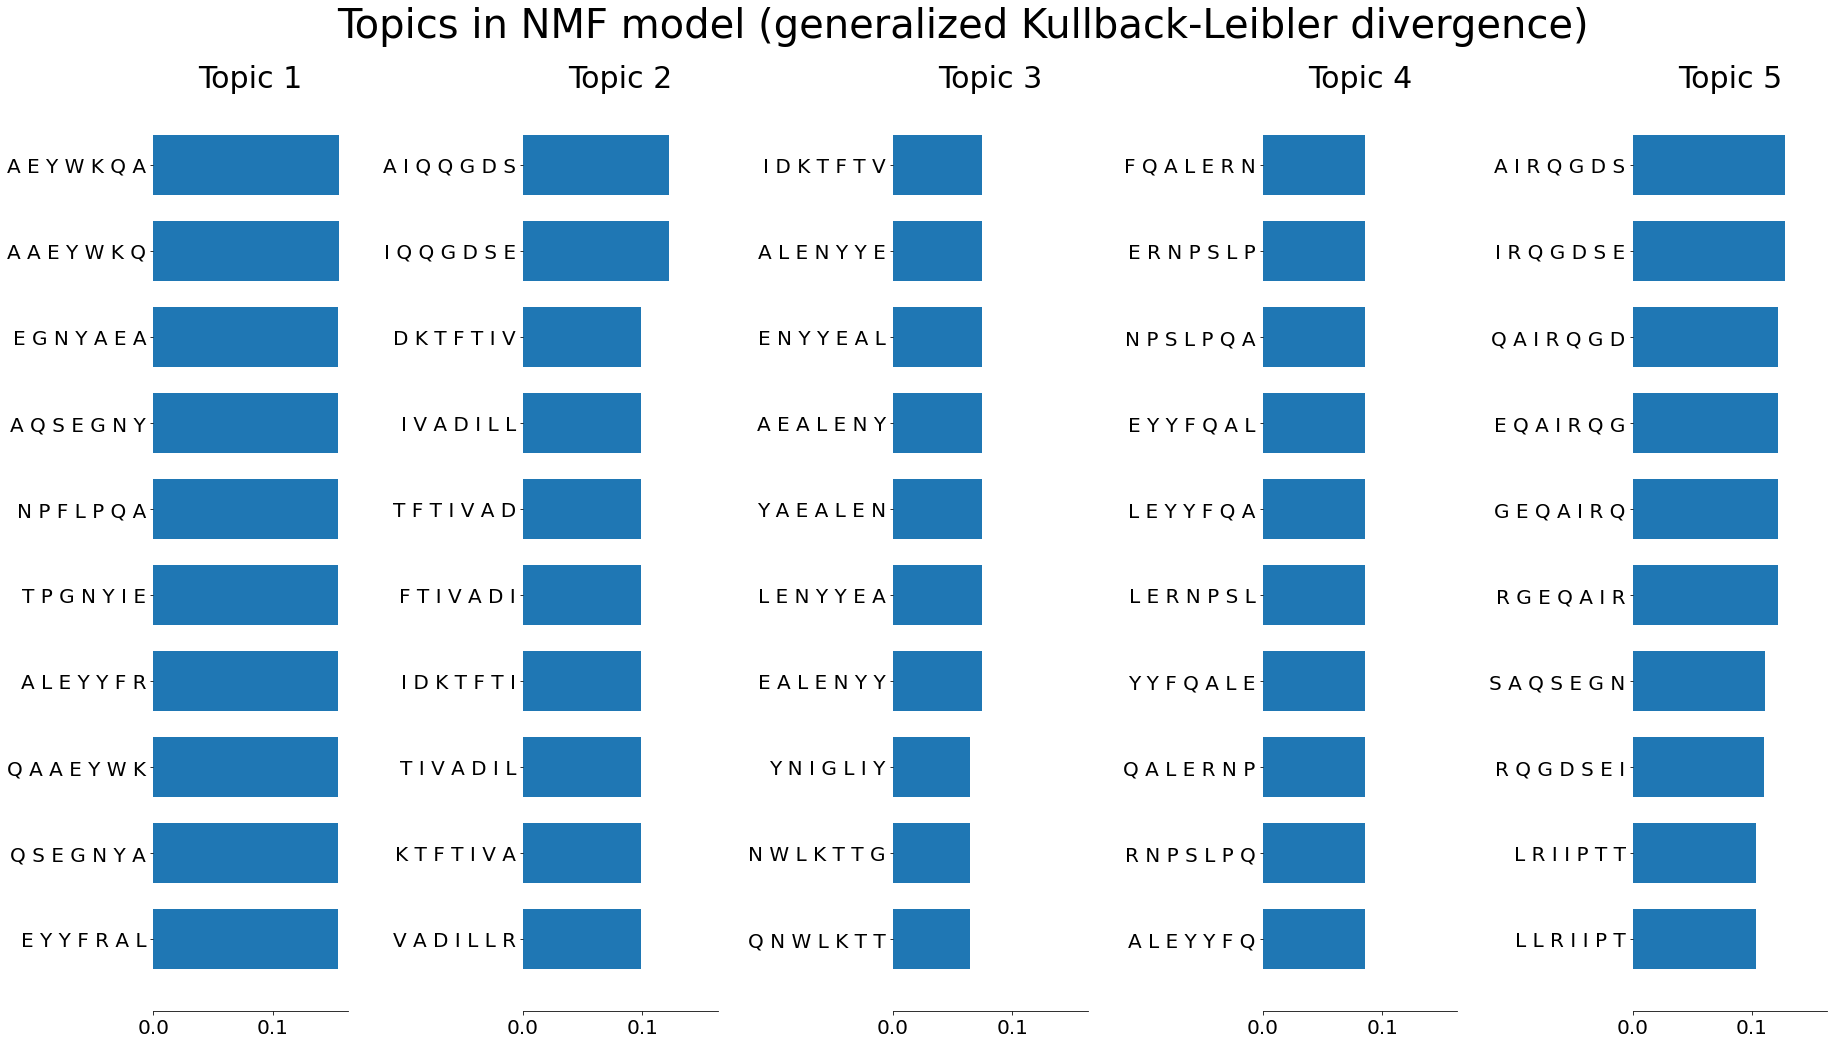



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


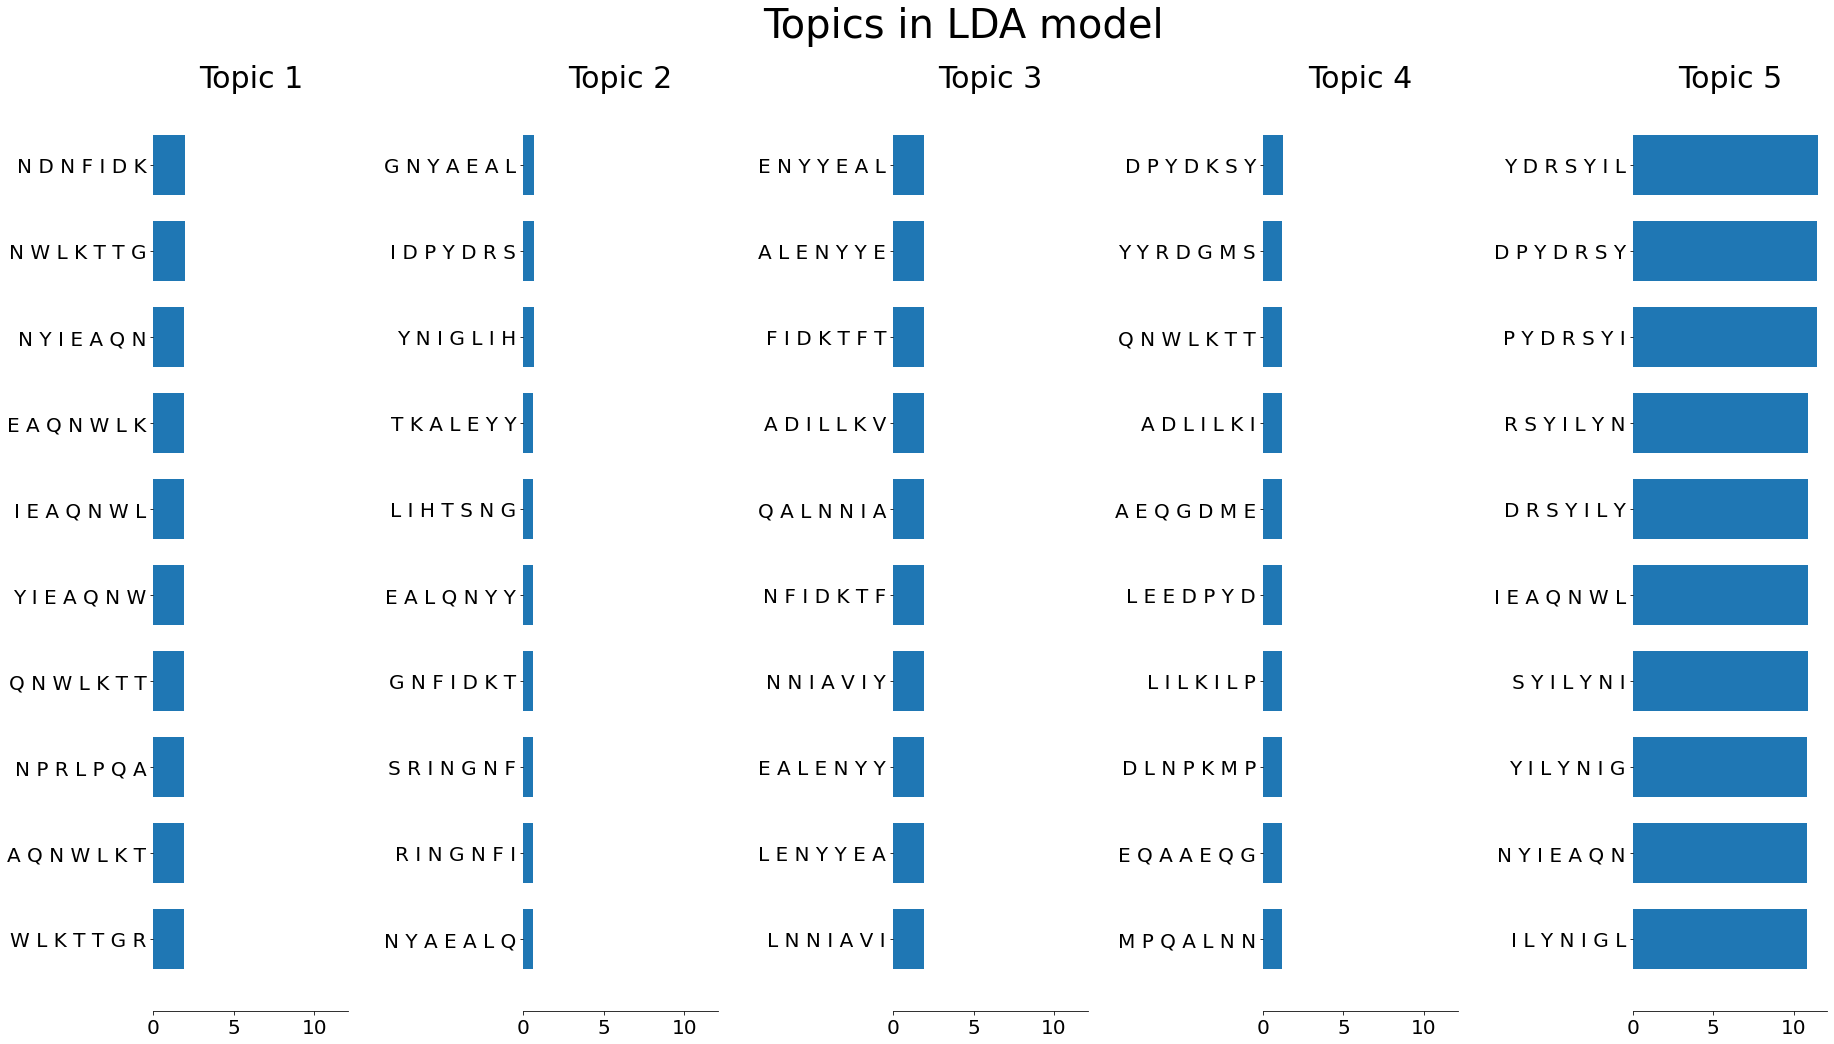




amino acid ngram range of study - (6, 6)
Extracting tf-idf features for NMF...
done in 0.148s.
Extracting tf features for LDA...
done in 0.005s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.096s.


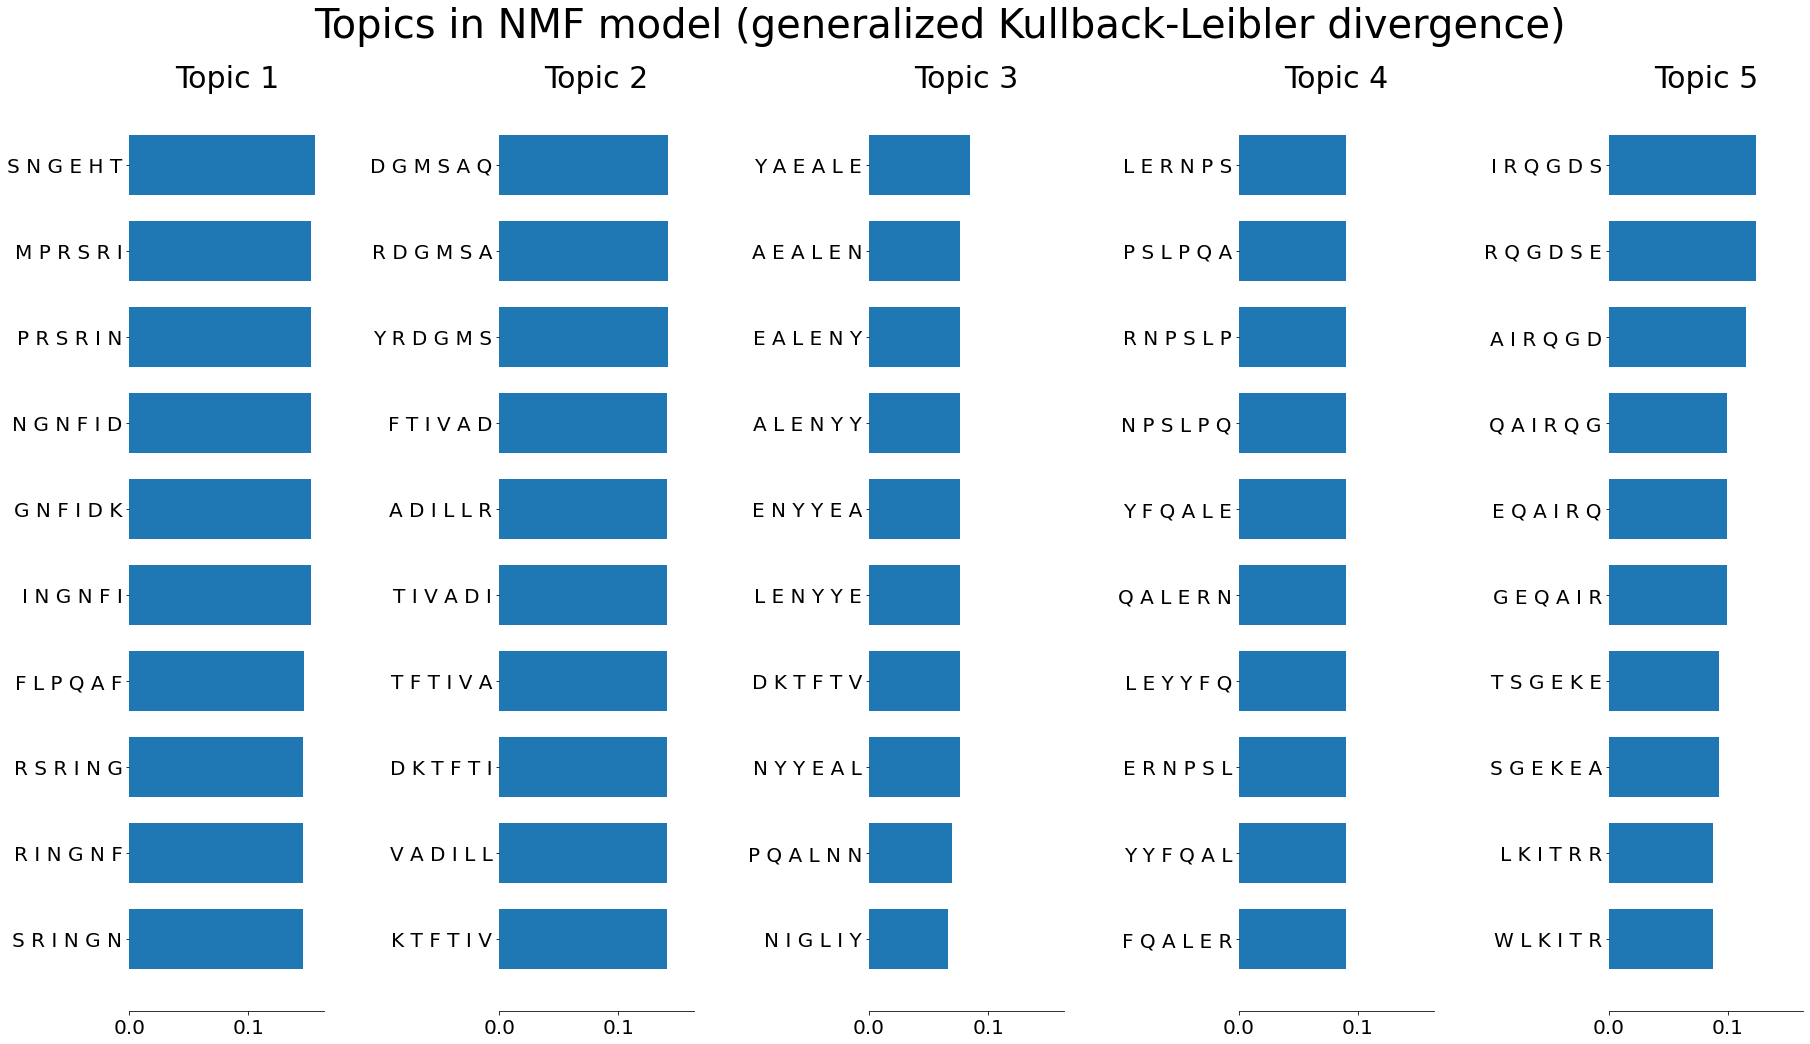



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


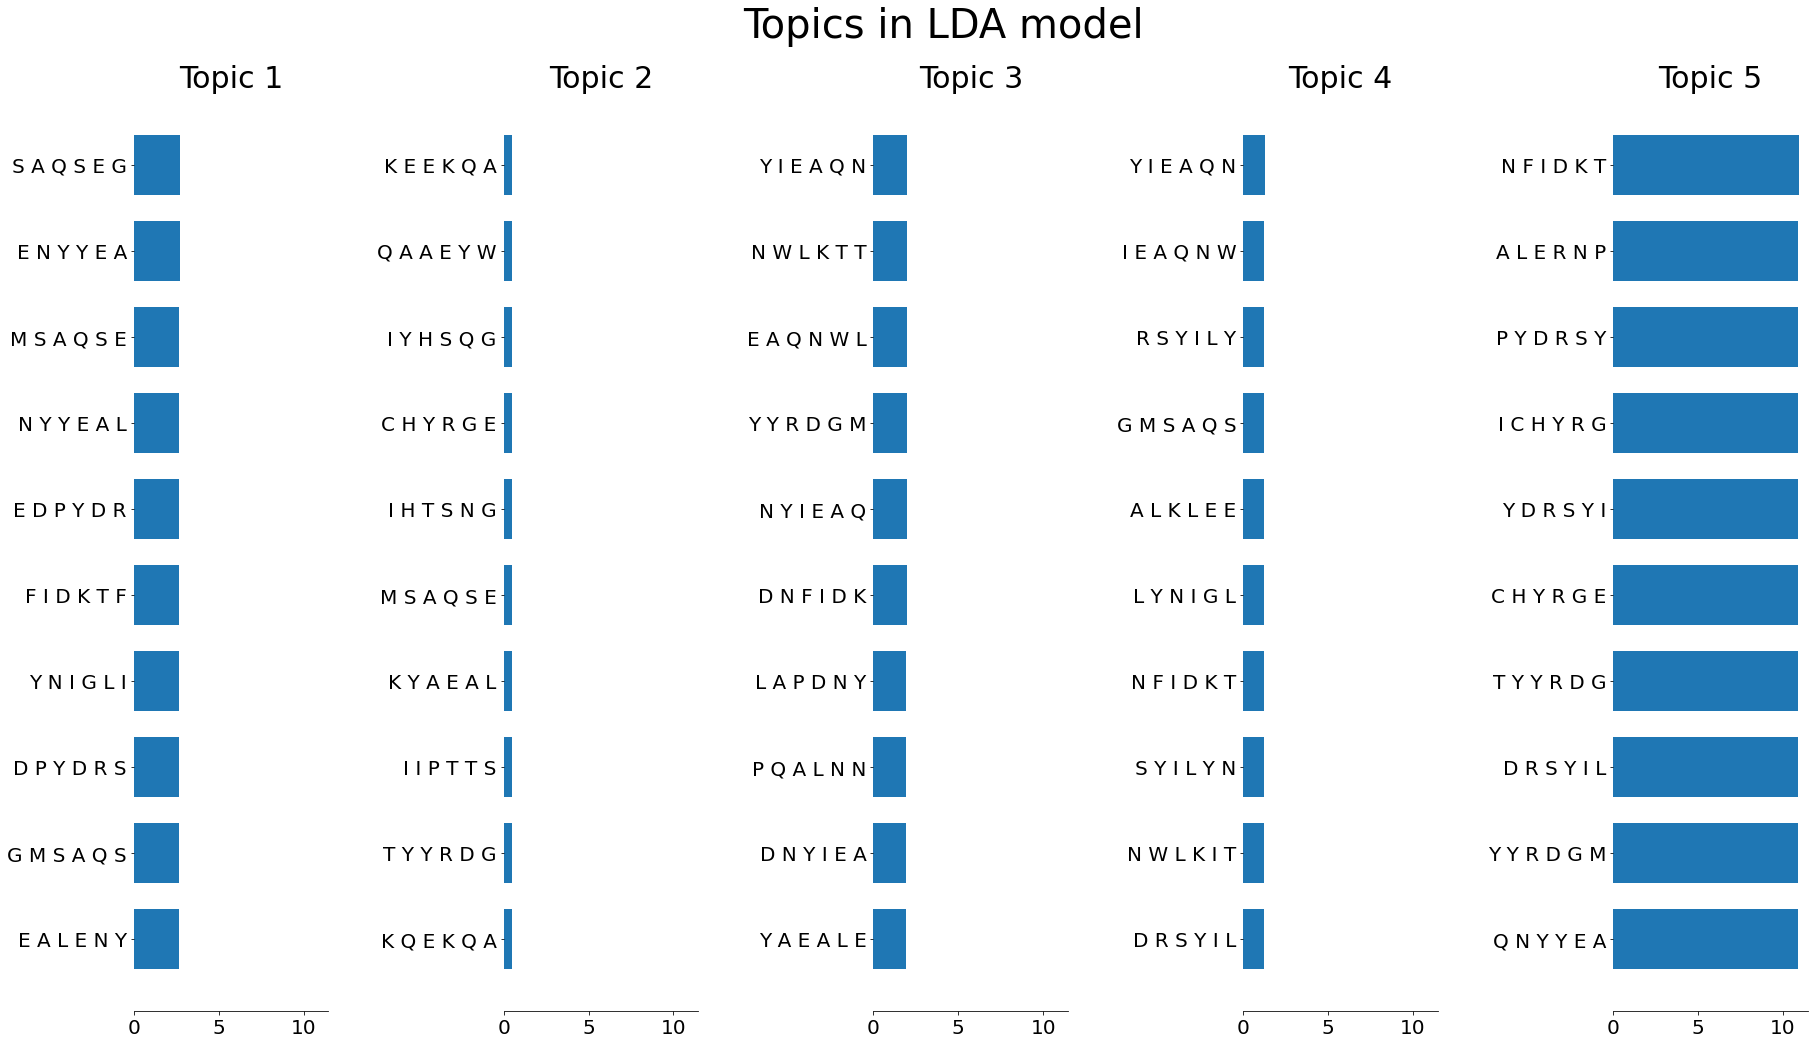




amino acid ngram range of study - (5, 5)
Extracting tf-idf features for NMF...
done in 0.014s.
Extracting tf features for LDA...
done in 0.009s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.118s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


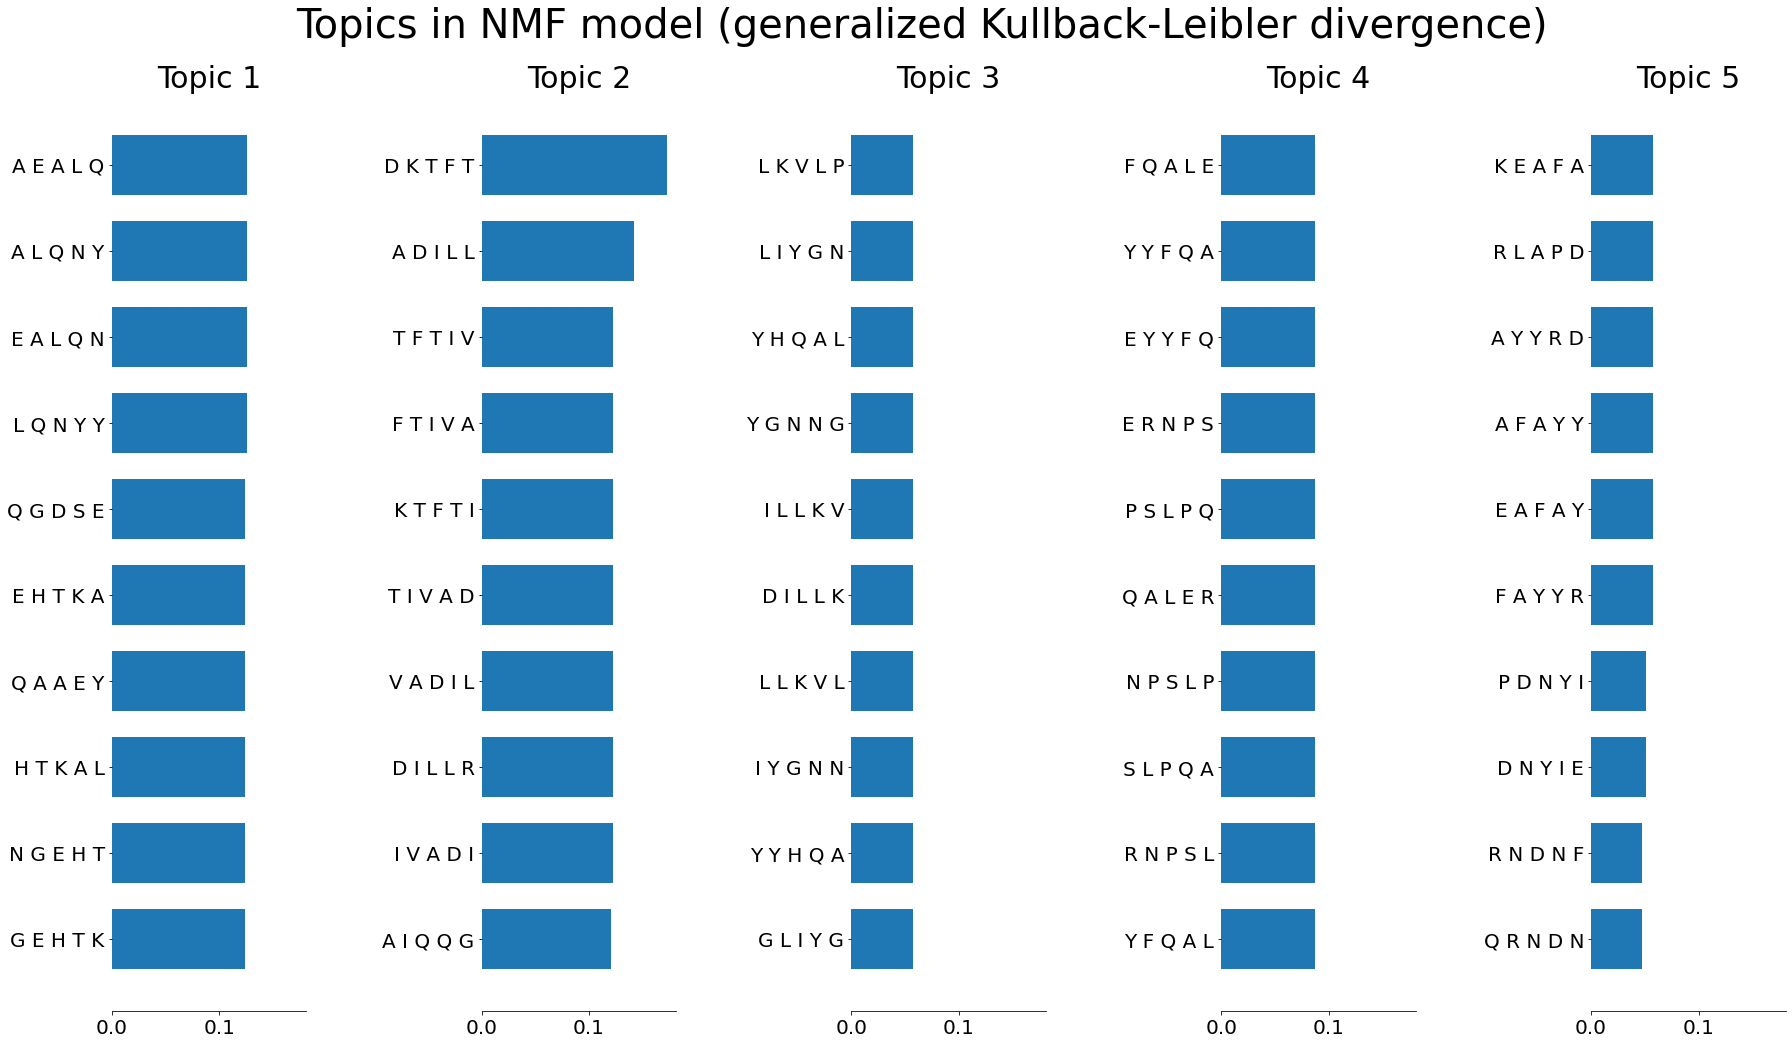



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


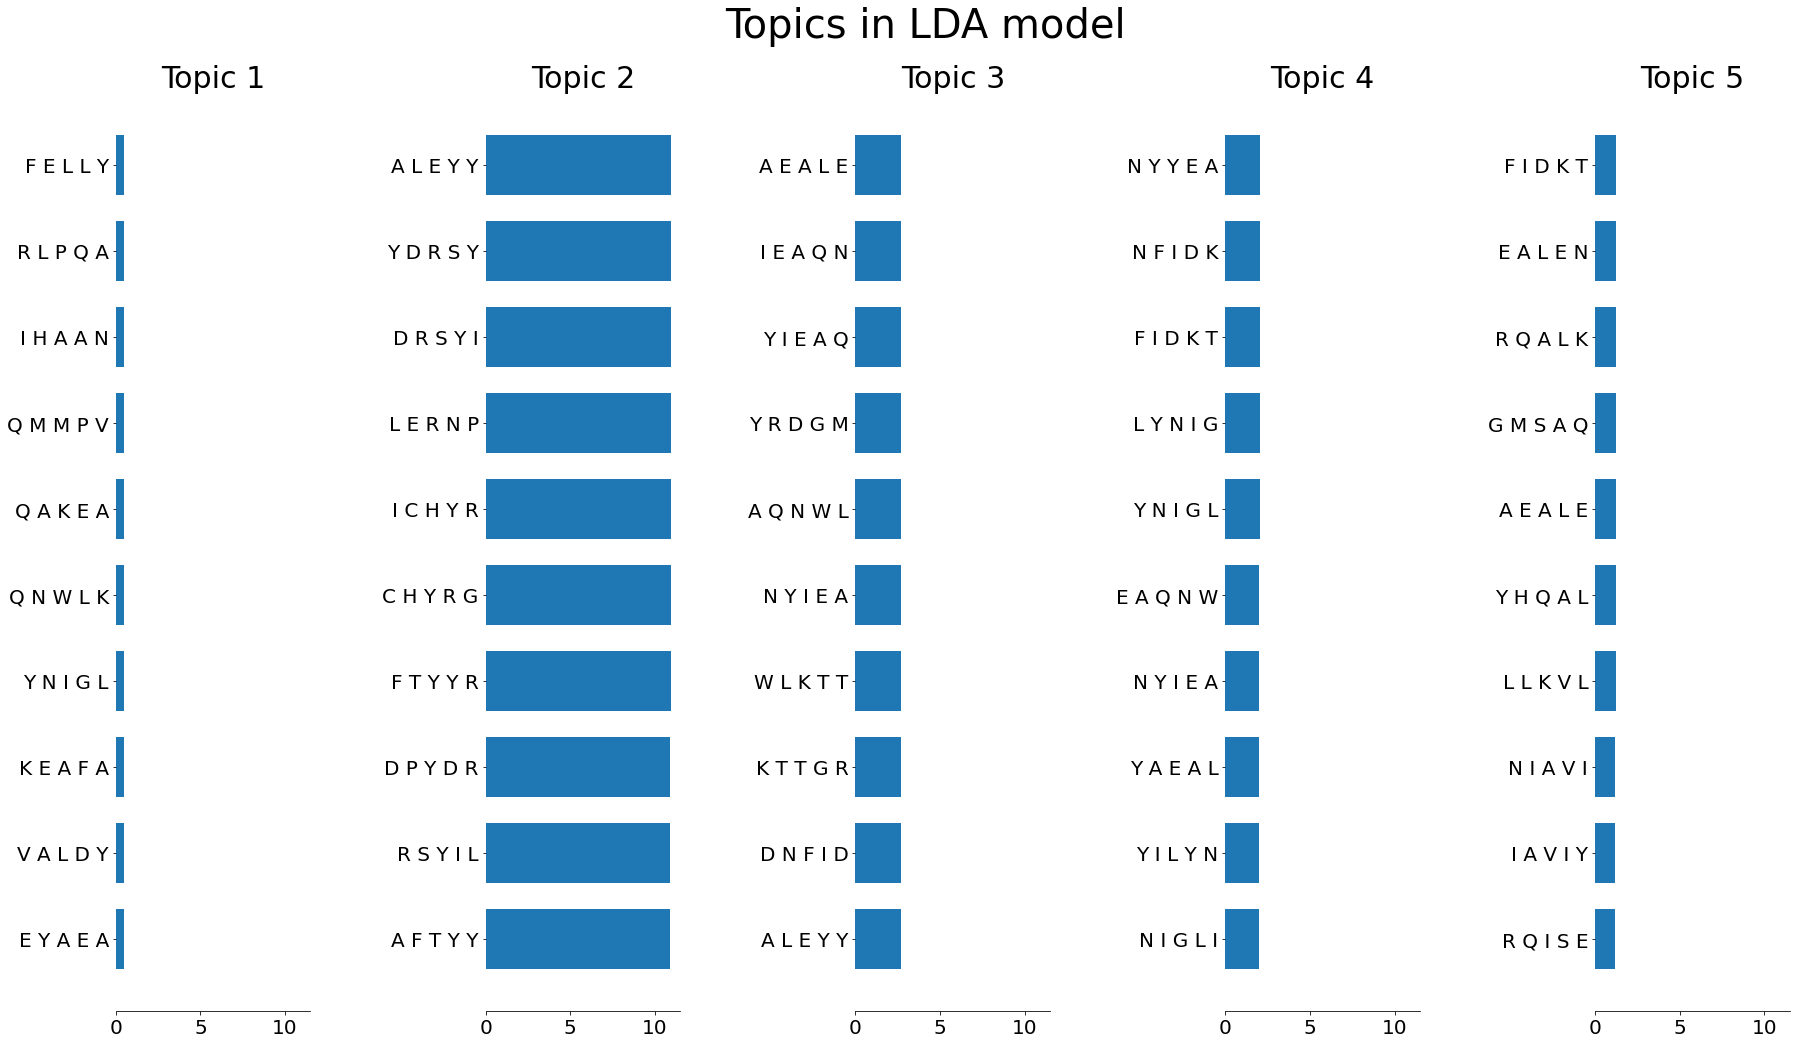




amino acid ngram range of study - (4, 4)
Extracting tf-idf features for NMF...
done in 0.012s.
Extracting tf features for LDA...
done in 0.009s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.102s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


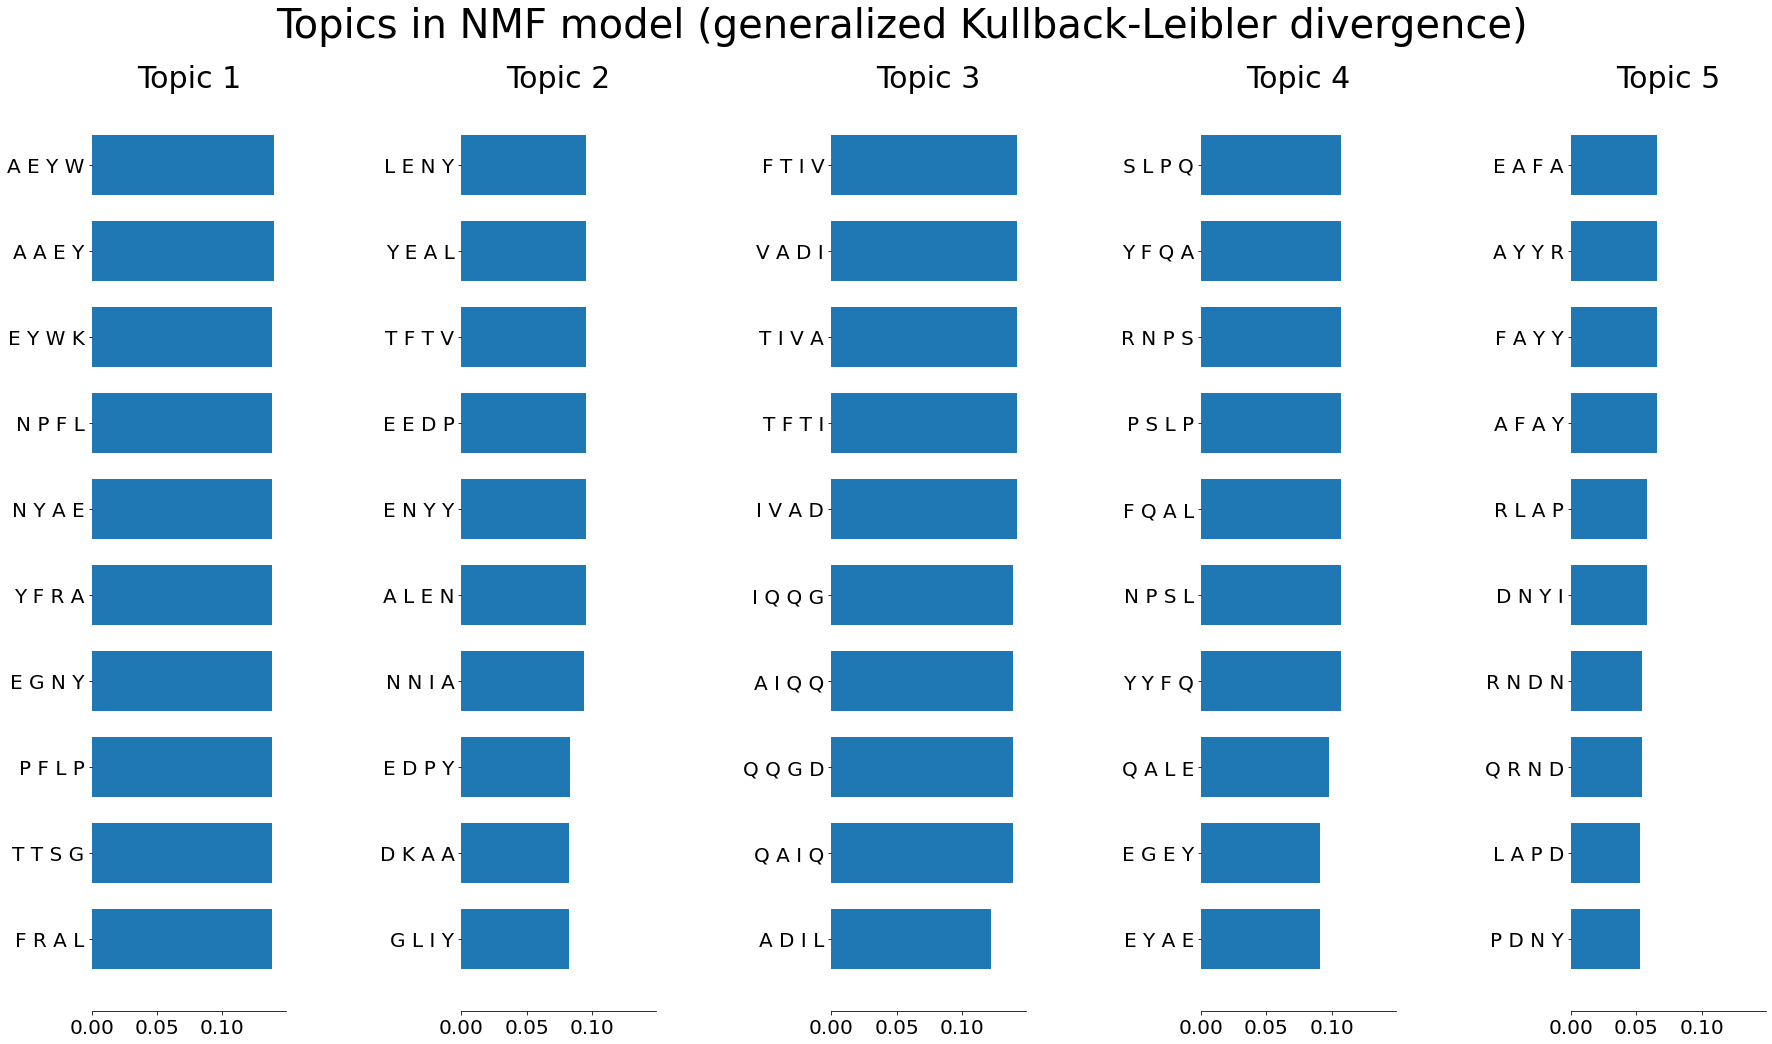



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


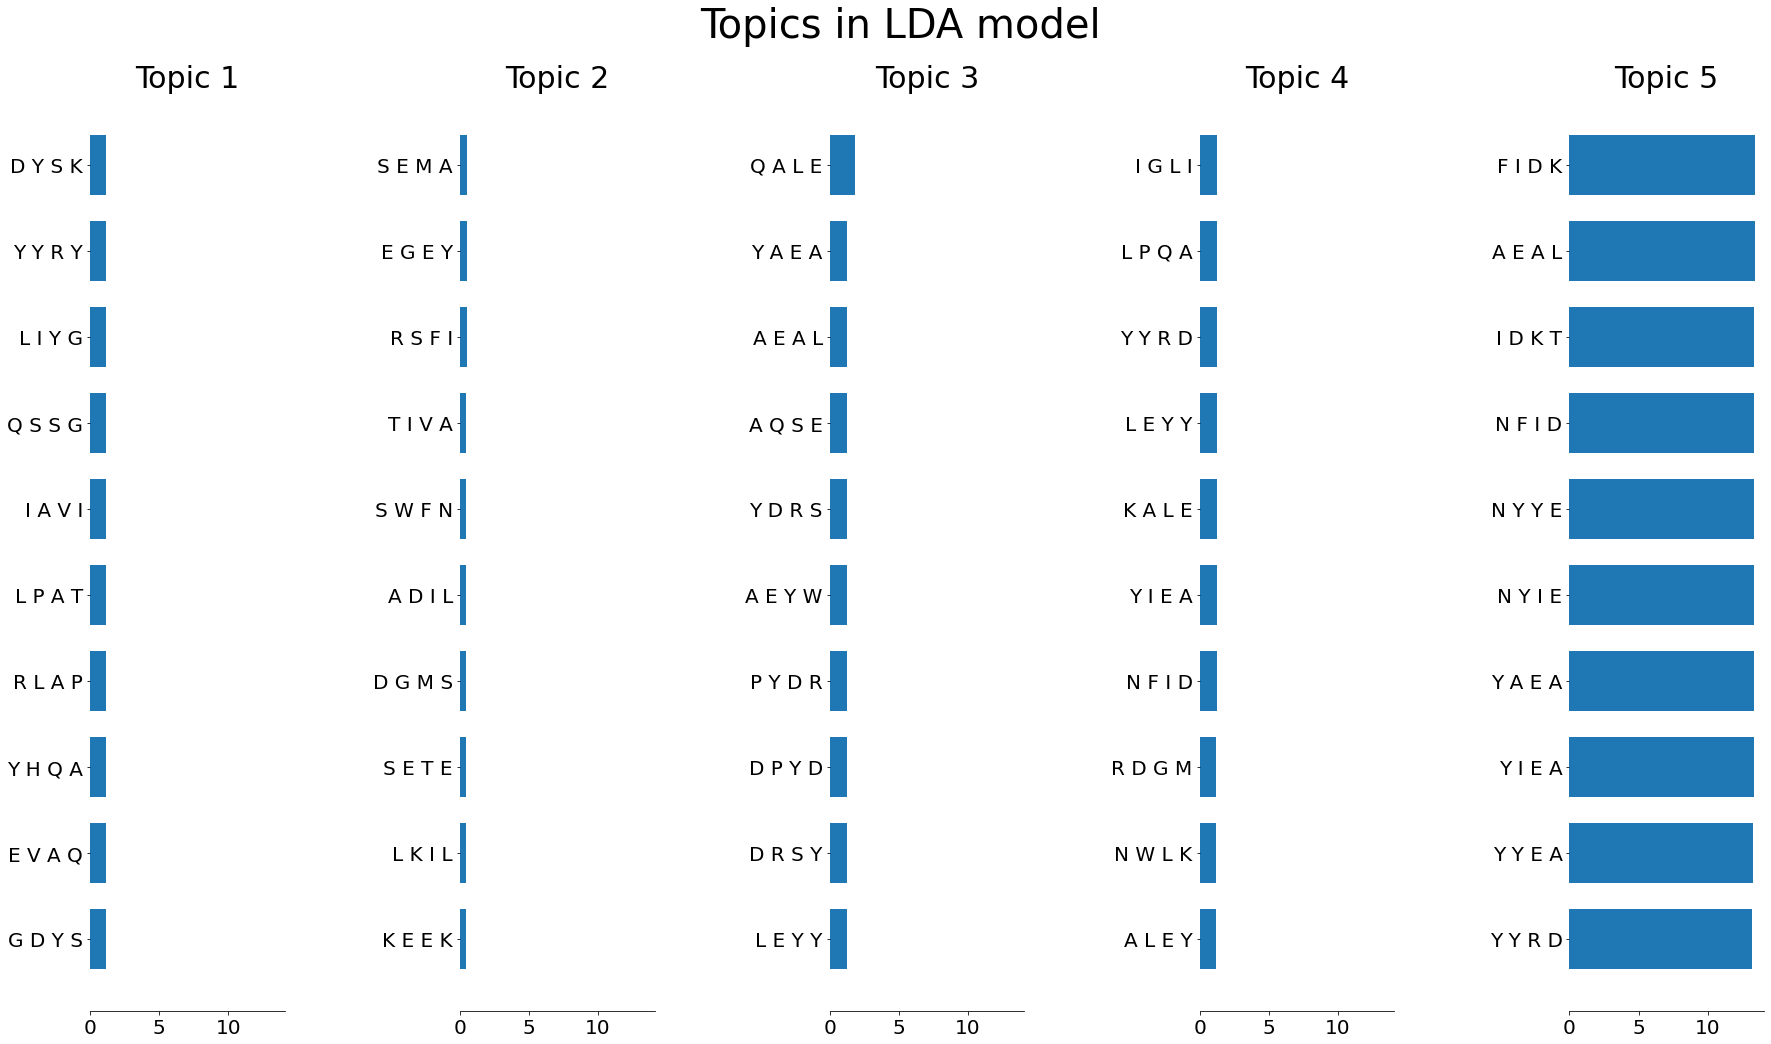




amino acid ngram range of study - (3, 3)
Extracting tf-idf features for NMF...
done in 0.015s.
Extracting tf features for LDA...
done in 0.010s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.098s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


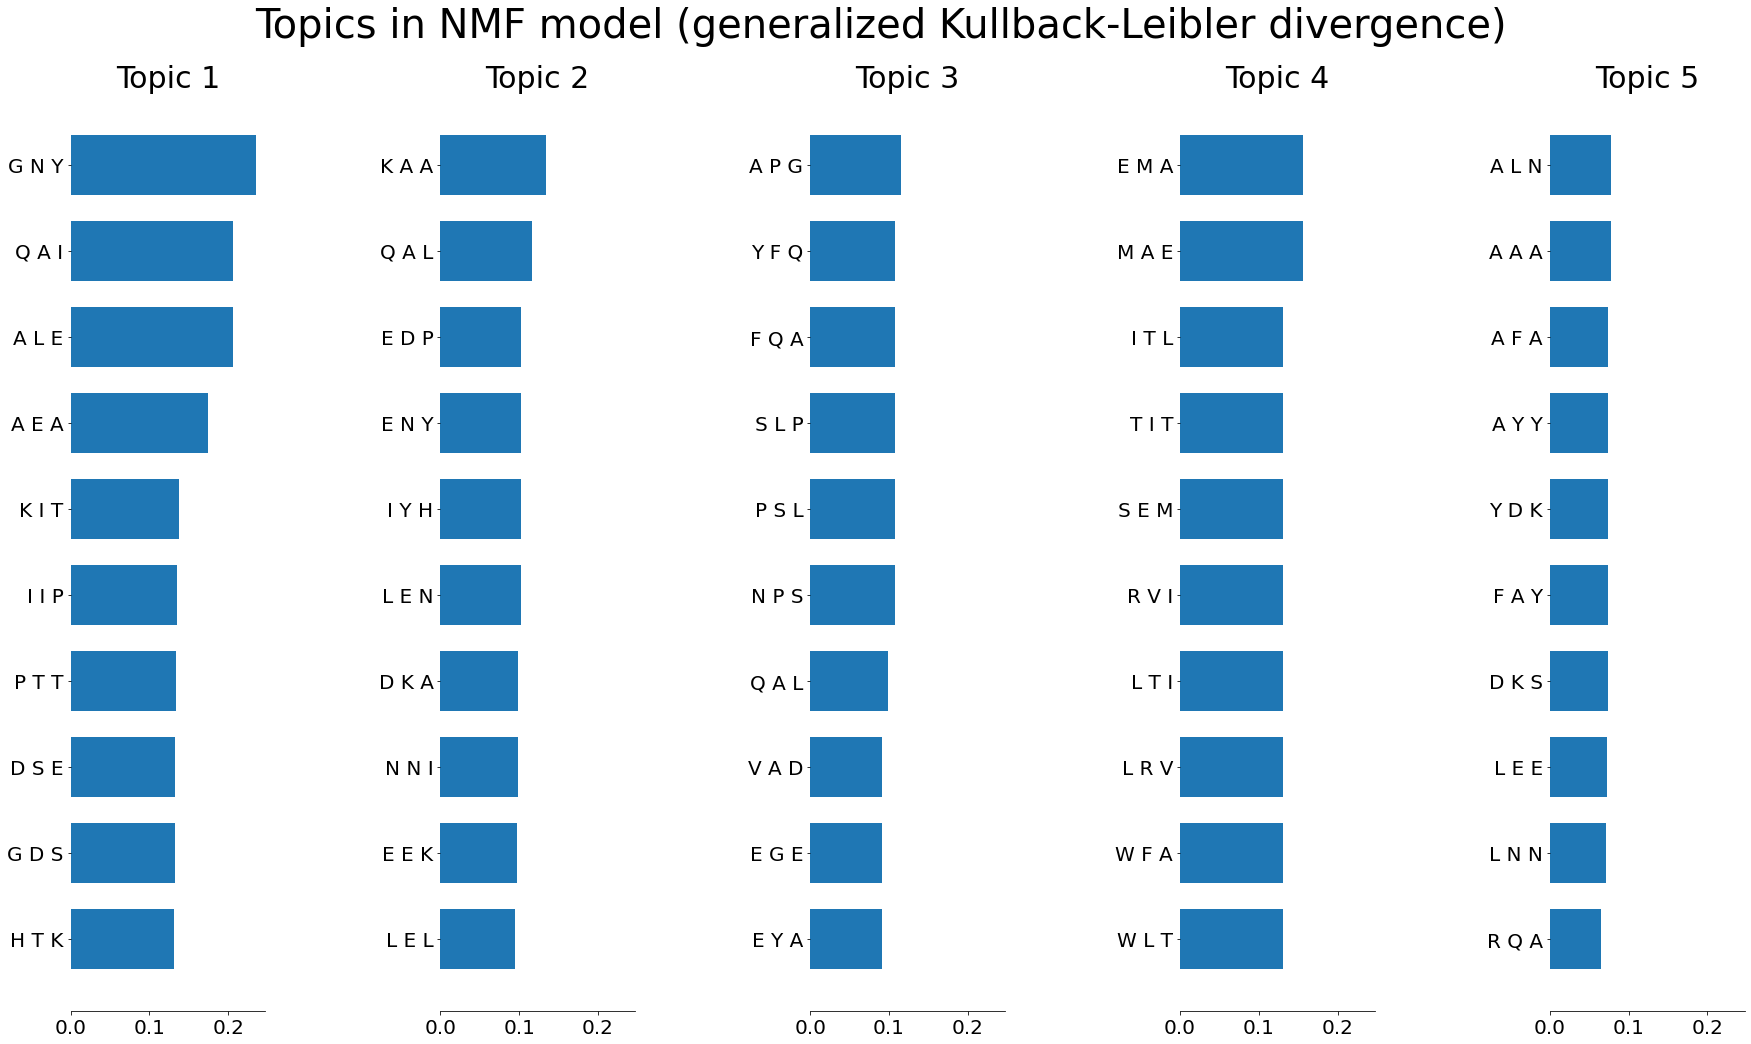



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


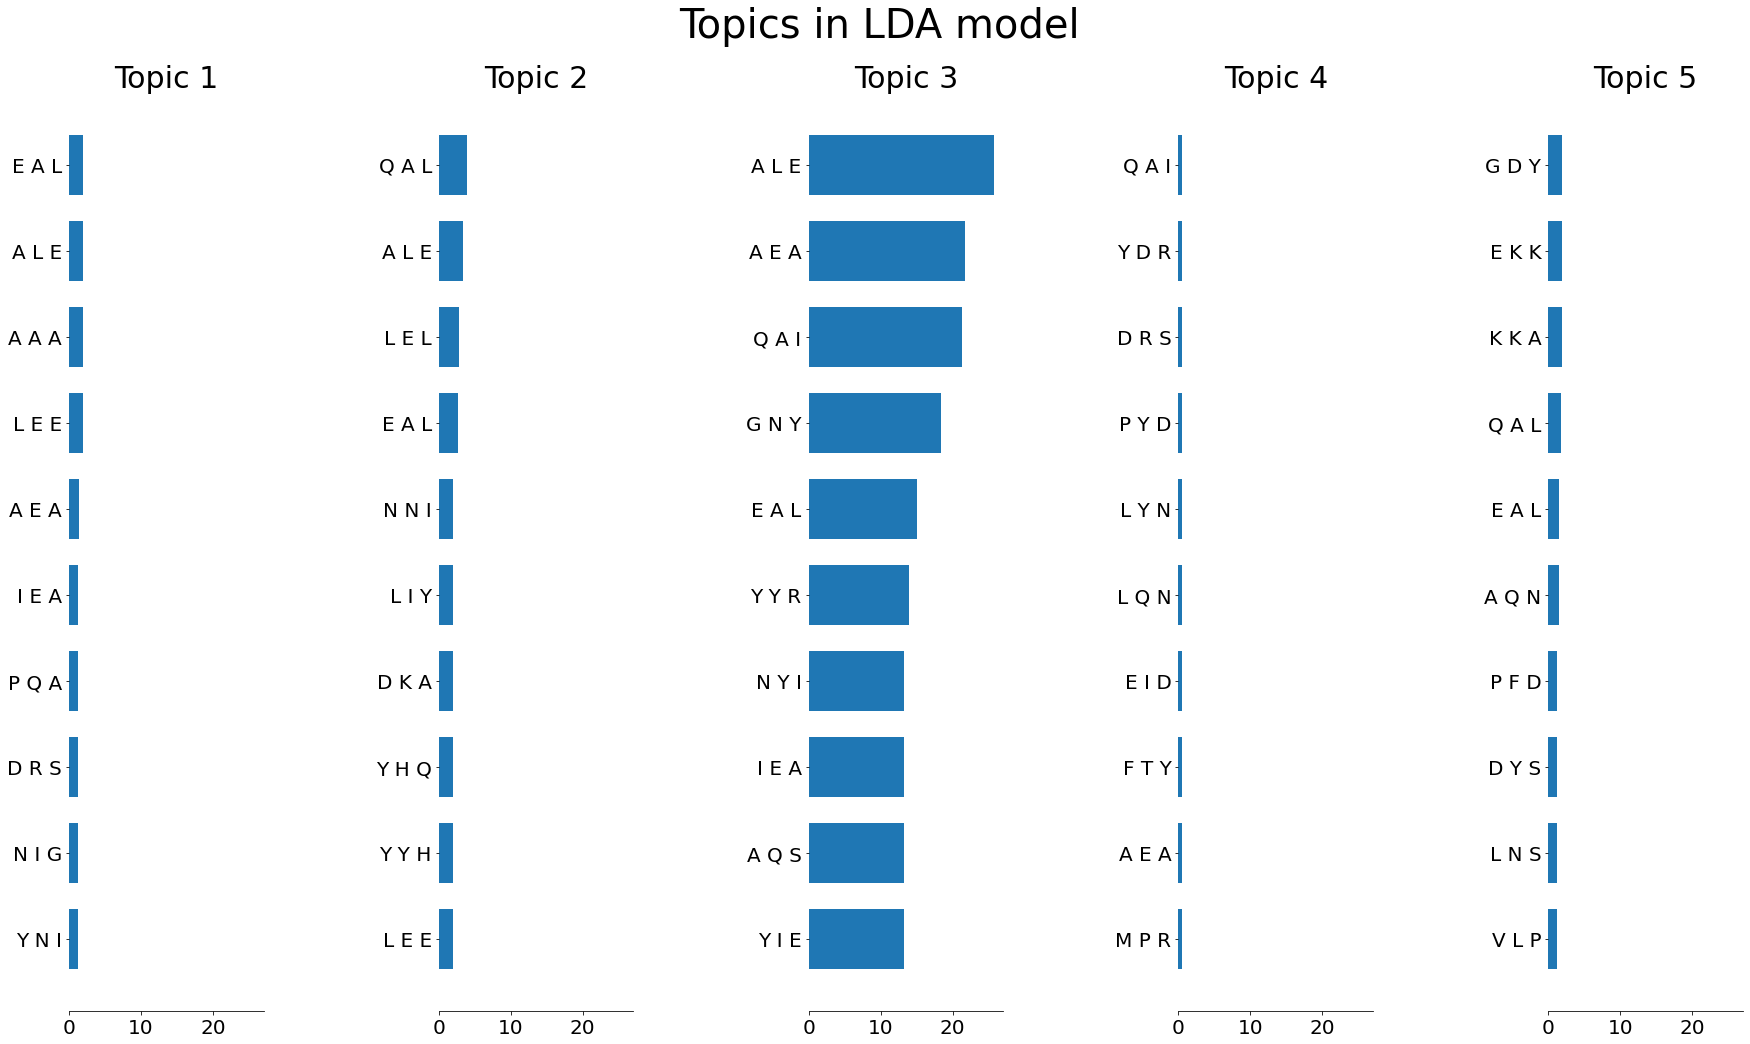




amino acid ngram range of study - (2, 2)
Extracting tf-idf features for NMF...
done in 0.011s.
Extracting tf features for LDA...
done in 0.008s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.106s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


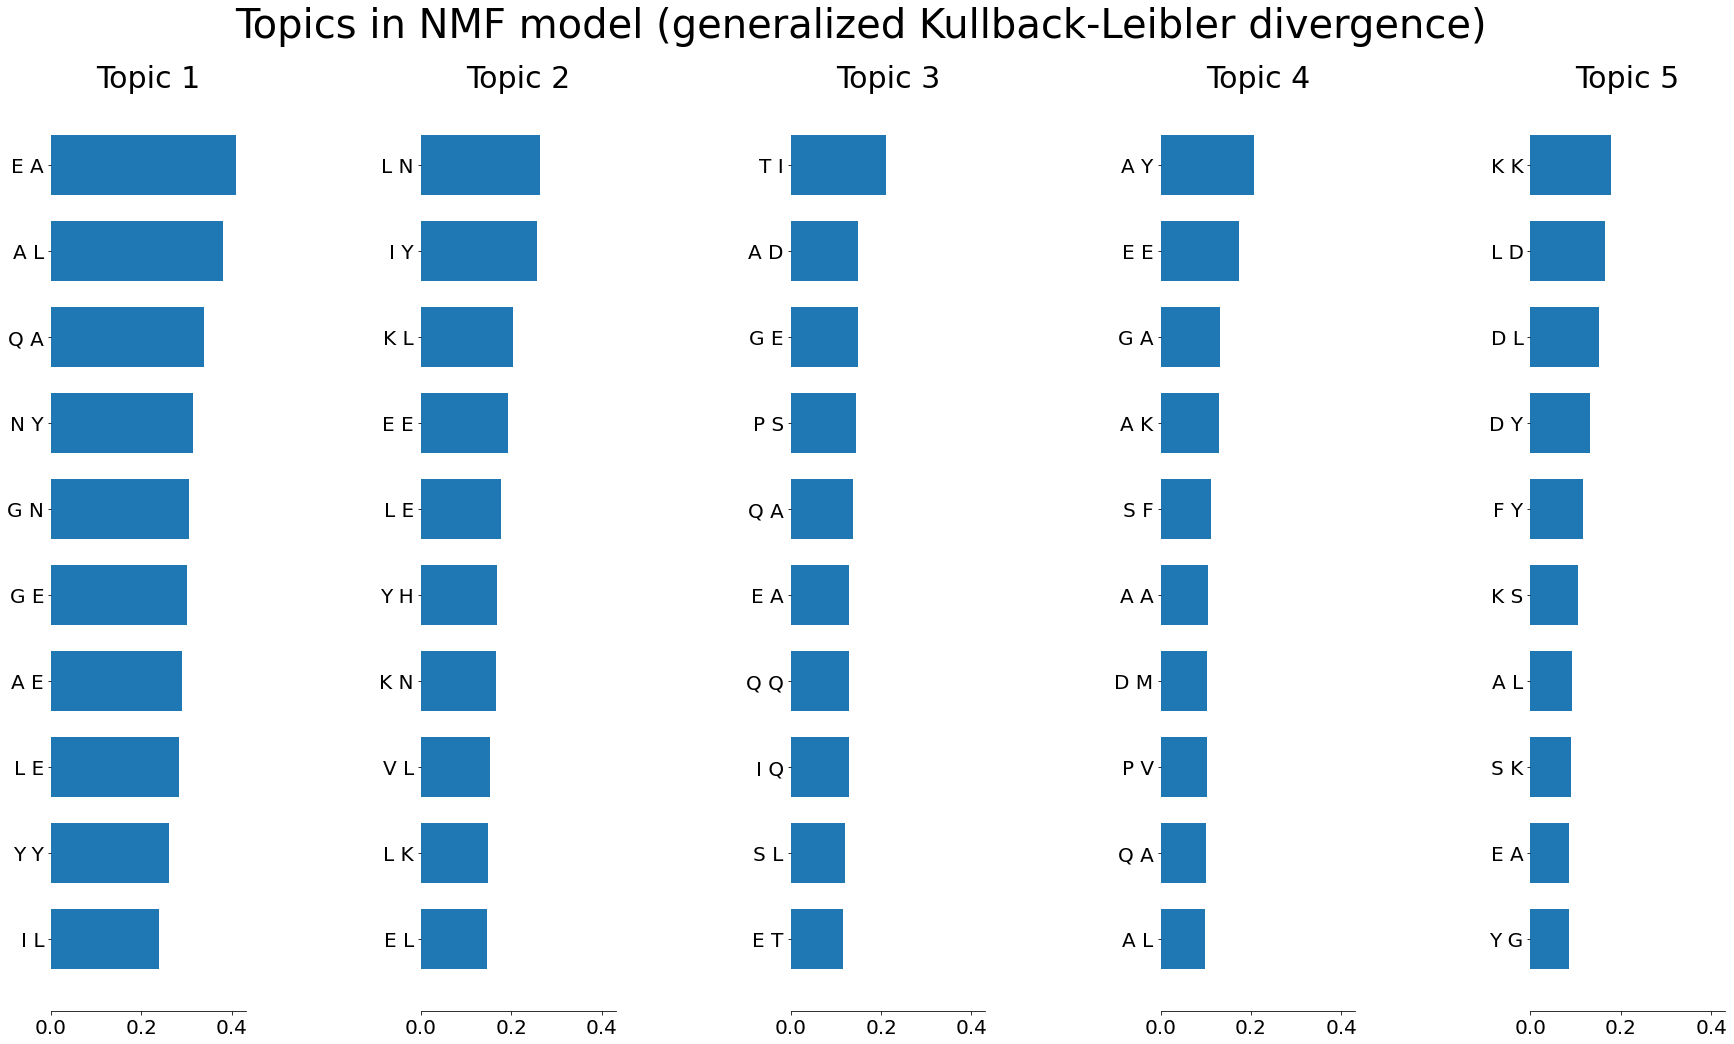



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


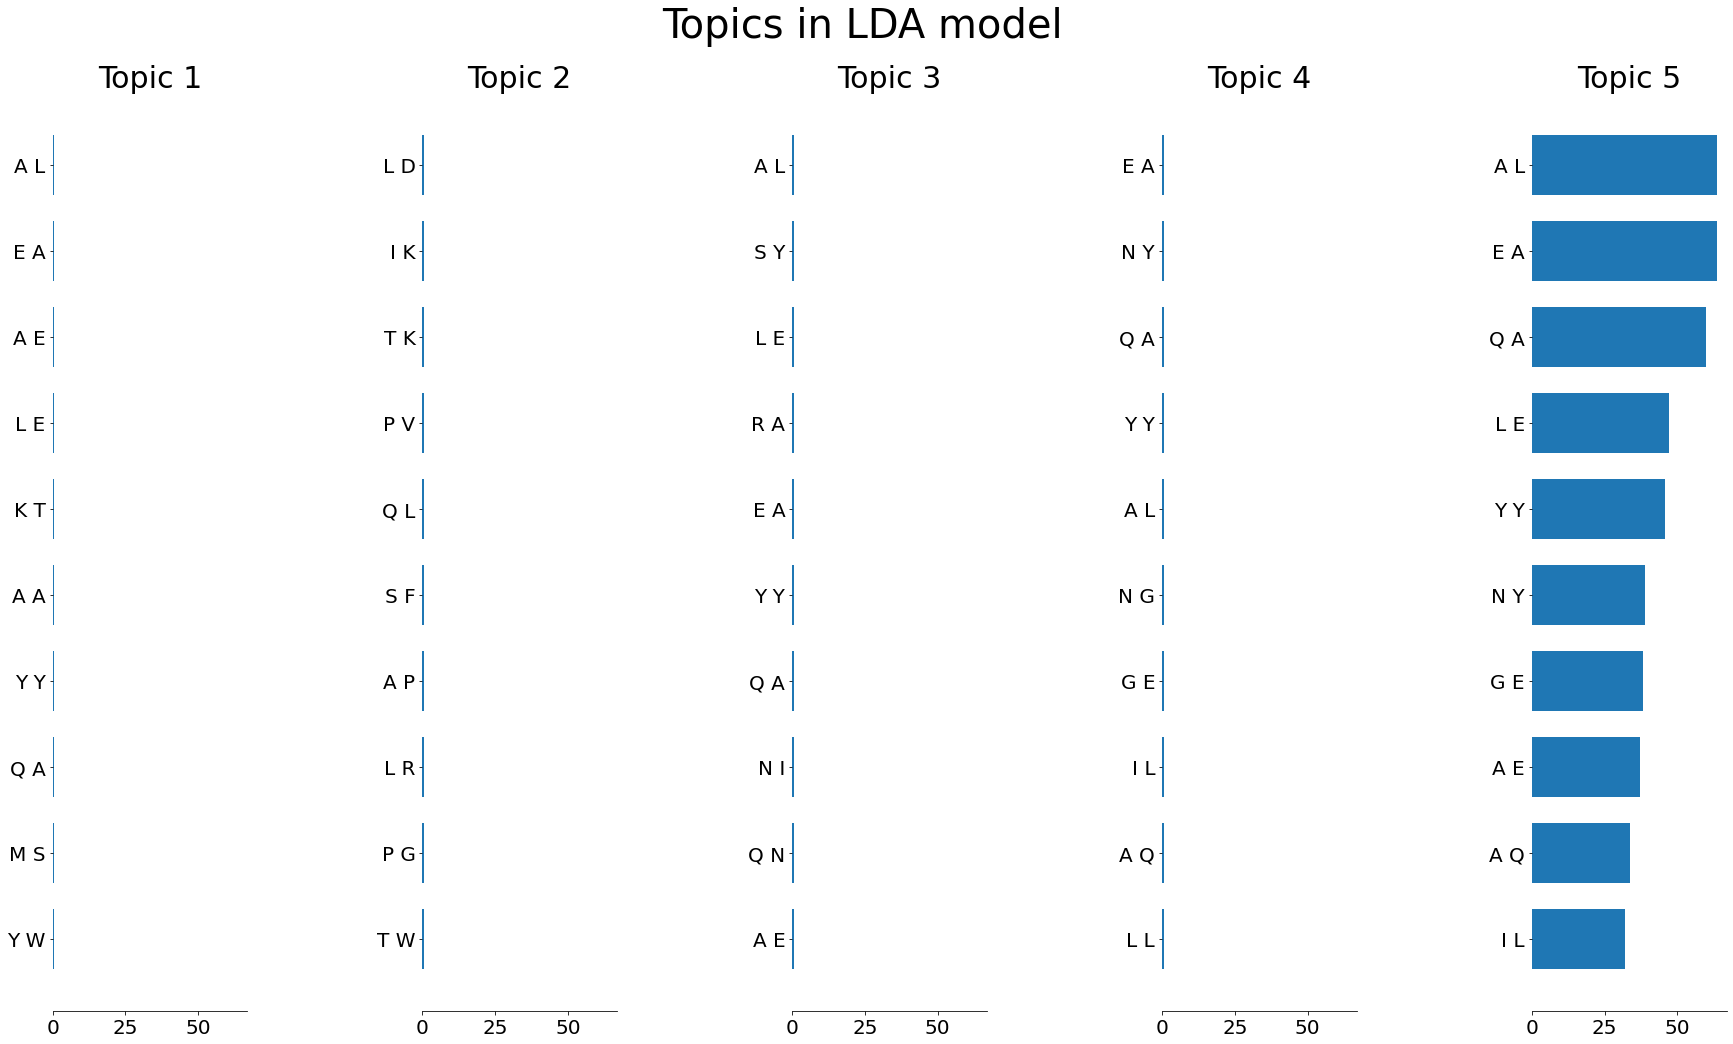




amino acid ngram range of study - (1, 1)
Extracting tf-idf features for NMF...
done in 0.007s.
Extracting tf features for LDA...
done in 0.004s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.133s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


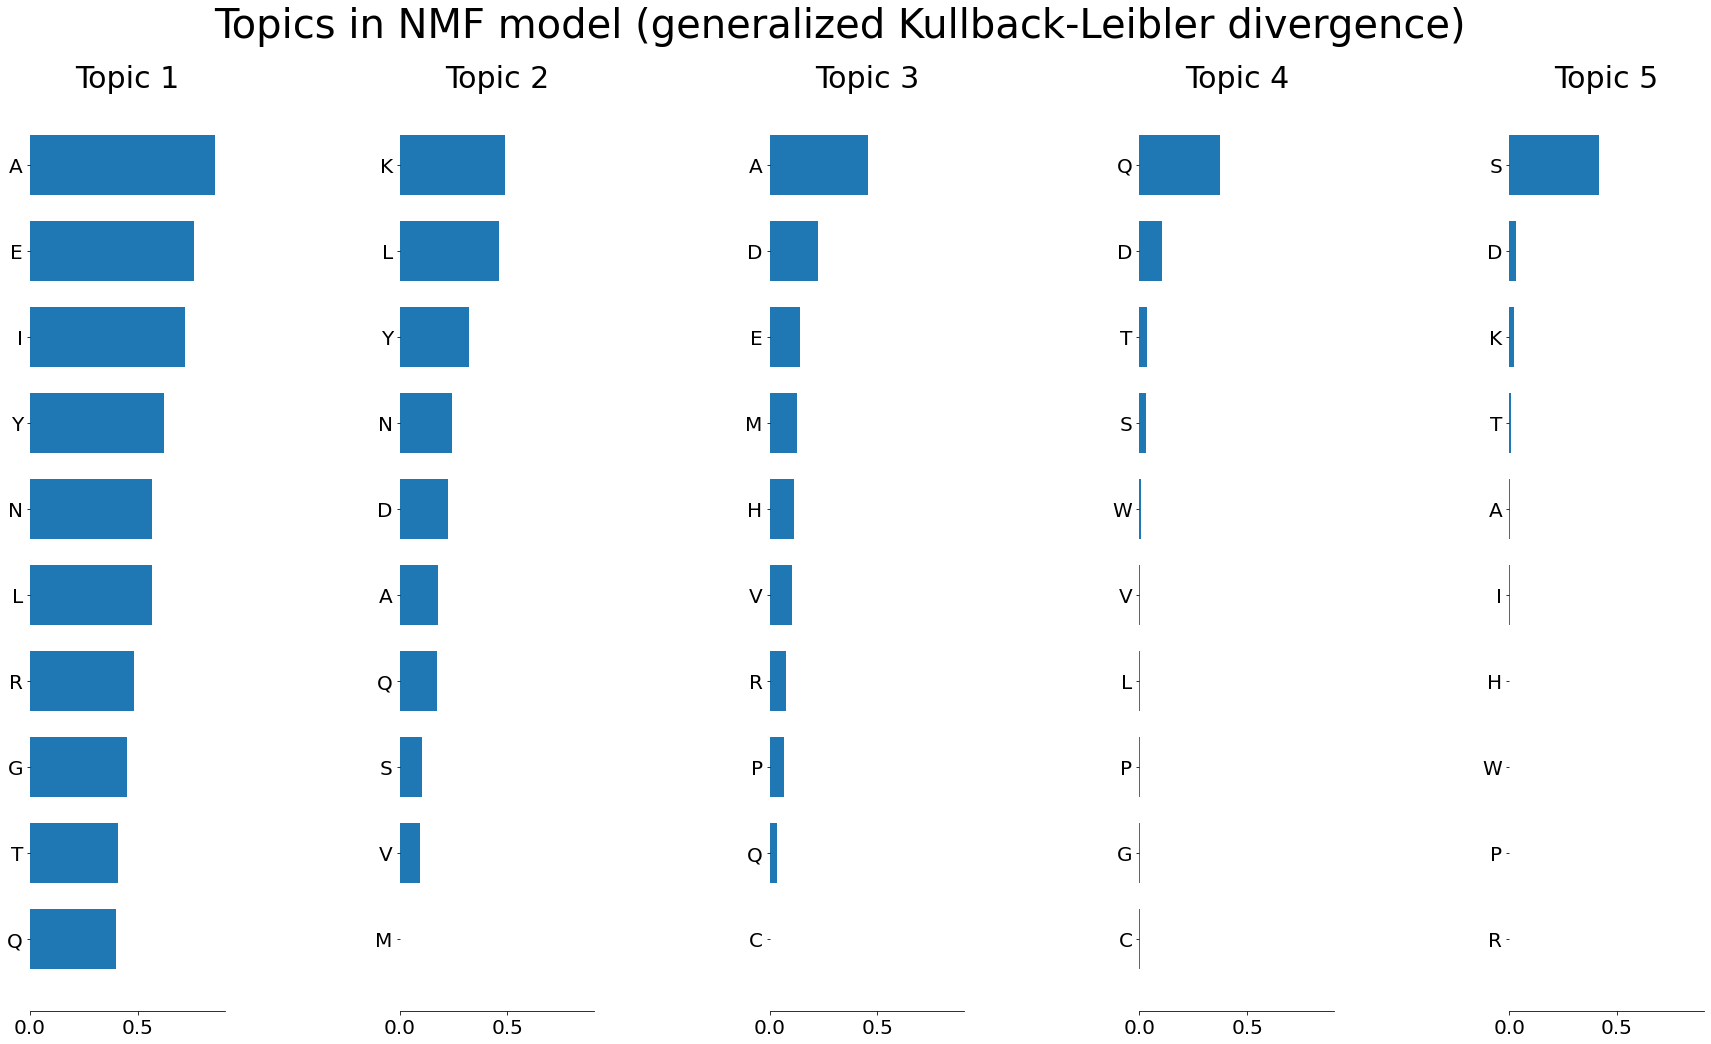



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


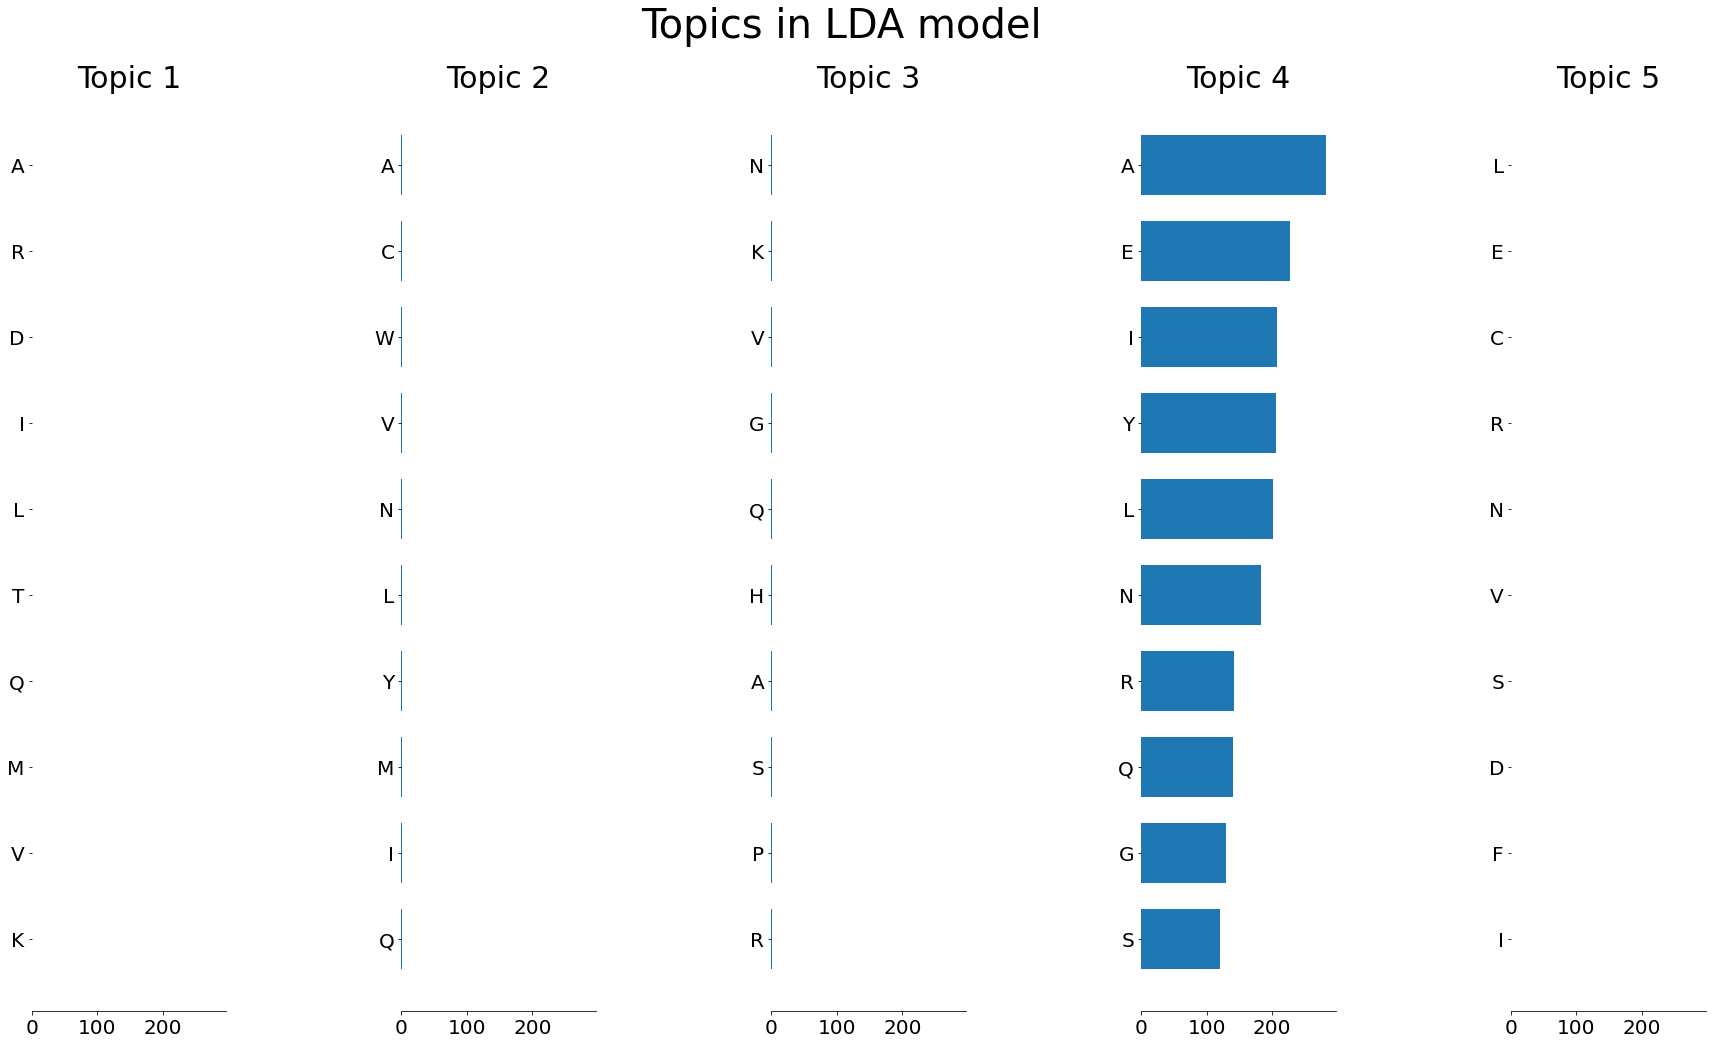

In [6]:
data_samples = df['protein split']
buf_df = pd.DataFrame()

for ngram_range_seed in ngram_ranges:

  # build ngram range tuple
  ngram_range = (ngram_range_seed, ngram_range_seed)
  print()
  print()
  print()
  print('amino acid ngram range of study - %s' % (ngram_range,))


# Use tf-idf features for NMF.
  print("Extracting tf-idf features for NMF...")
  tfidf_vectorizer = TfidfVectorizer(
                                  token_pattern='(?u)\\b\\w+\\b'
                                , lowercase=False
                                , ngram_range=ngram_range  
                                ,  
                                #    max_df=1
                                #  , min_df=2
                                #    max_features=n_features
                                #  , stop_words="english"
)
  t0 = time()
  tfidf = tfidf_vectorizer.fit_transform(data_samples)
  print("done in %0.3fs." % (time() - t0))

  # Use tf (raw term count) features for LDA.
  print("Extracting tf features for LDA...")
  tf_vectorizer = CountVectorizer(
                                    token_pattern='(?u)\\b\\w+\\b'
                                  , lowercase=False
                                  , ngram_range=ngram_range
                                  , 
                                  #    max_df=1
                                  #  , min_df=2
                                  #   max_features=n_features
                                  #  , stop_words="english"
  )
  t0 = time()
  tf = tf_vectorizer.fit_transform(data_samples)
  print("done in %0.3fs." % (time() - t0))
  print()


  # Fit the NMF model
  print(
      "\n" * 2,
      "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features),
  )
  t0 = time()
  nmf = NMF(
      n_components=n_components,
      random_state=1,
      beta_loss="kullback-leibler",
      solver="mu",
      max_iter=1000,
      alpha=0.1,
      l1_ratio=0.5,
  ).fit(tfidf)
  print("done in %0.3fs." % (time() - t0))

  tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
  dfff = plot_top_words(
      nmf,
      tfidf_feature_names,
      n_top_words,
      "Topics in NMF model (generalized Kullback-Leibler divergence)"
  )

  dfff['model'] = 'nmf'
  dfff['ngram_seed'] = ngram_range_seed
  buf_df = pd.concat([buf_df, dfff])

  print(
      "\n" * 2,
      "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features),
  )
  lda = LatentDirichletAllocation(
      n_components=n_components,
      max_iter=25,
      learning_method="online",
      learning_offset=50.0,
      random_state=0,
  )

  lda.fit(tf)

  tf_feature_names = tf_vectorizer.get_feature_names_out()
  dff = plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

  dff['model'] = 'lda'
  dff['ngram_seed'] = ngram_range_seed
  buf_df = pd.concat([buf_df, dff])

In [20]:
# prime structure with input sequences
higher_order_sequence = df['protein split']
species_sequence = df['species']

buff_df = pd.DataFrame()
graph_lst = []
graph_node_lst = []
graph_specific_node_lst = []
graph_species_generic_node_lst = []

# for each latent representative
for md in ['lda', 'nmf']:

  # for each range of amino acid / peptide n-grams
  for ngram_range_seed in ngram_ranges:

    # reset buffer at each ngram
    buf_lst = []

    # for each combination of sequence length and model
    df_slice = buf_df[buf_df['ngram_seed'] == ngram_range_seed]
    df_slice = df_slice[df_slice['model'] == md]

    # for each cluster of peptide / acids
    rw = 0
    for cluster in range(1, n_components):

      peptide_node = f"Topic_{cluster}_node"
      peptide_specific_node = f"{ngram_range_seed}_Seq_Topic_{cluster}_node"
      peptide_weight = f"Topic_{cluster}_weight"

      # for each combination of cluster and ngram peptide
      for scenerio in range(0, len(peptide_node)):
      
        # envoke pods
        try:

          # dont return to much info
          if len(df_slice[peptide_node][scenerio]) > 2:

            #print('%s Model - Topic - %d Node - %s Weight %s' % ( md
            #                                                    , cluster
            #                                                    , df_slice[peptide_node][scenerio]
            #                                                    , df_slice[peptide_weight][scenerio]))
            
            # populate buffer list
            buf_lst.append(df_slice[peptide_node][scenerio])

        # empty pods
        except:
          pass


        # for each higher order sequence
        for protein in higher_order_sequence:

              # attempt to locate sub components
              try:

                # dont return to much info
                if len(df_slice[peptide_node][scenerio]) > 2:

                  # if sequence is in above sequence
                  if df_slice[peptide_node][scenerio] in protein:
                    
                    # echo relationship
                    # print(f'    {(protein[:20] + "..") if len(protein) > 20 else protein}')
                    print(higher_order_sequence.index(protein))
                    print(species_sequence[higher_order_sequence.index(protein)])

                    # populate graph source
                    graph_lst.append([(protein[:20] + "..") if len(protein) > 20 else protein
                                    ,df_slice[peptide_node][scenerio]
                                    ,df_slice[peptide_weight][scenerio]])
                    
                    # populate topic graph
                    graph_node_lst.append([peptide_node
                                         ,df_slice[peptide_node][scenerio]
                                         ,df_slice[peptide_weight][scenerio]])

                    # populate ngram specific nodes
                    graph_specific_node_lst.append([peptide_specific_node
                                         ,df_slice[peptide_node][scenerio]
                                         ,df_slice[peptide_weight][scenerio]])
                    
                    # populate species generic level specific nodes
                    graph_species_generic_node_lst.append([species_sequence[higher_order_sequence.index(protein)]
                                         ,df_slice[peptide_node][scenerio]
                                         ,df_slice[peptide_weight][scenerio]])                    
                    


              except:
                pass

        # increment count
        rw += 1

    # populate rolling hierarchy
    higher_order_sequence = buf_lst        

21
20
23
9
Cucumber
20
35
9
Cucumber
4
Corn
16
Red Alga
20
23
20
35
32
0
C. paradoxa
3
Japonica rice
9
Cucumber
14
Emiliania huxleyi
14
Emiliania huxleyi
5
Arabidopsis thaliana
5
Arabidopsis thaliana
5
Arabidopsis thaliana
14
Emiliania huxleyi
5
Arabidopsis thaliana
14
Emiliania huxleyi
3
Japonica rice
20
20
29
20
28
20
22
25
12
Earthmoss
11
Shining clubmoss
27
14
Emiliania huxleyi
2
Soybean
5
Arabidopsis thaliana
1
Amborella
6
Trieres chinensis
6
Trieres chinensis
3
Japonica rice
4
Corn
31
2
Soybean
0
C. paradoxa
39
2
Soybean
5
Arabidopsis thaliana
4
Corn
5
Arabidopsis thaliana
16
Red Alga
25
6
Trieres chinensis
35
39
13
Gloeobacter
4
Corn
7
Red Seaweed
32
39
29
20
20
31
20
24
20
23
22
24
28
21
25
1
Amborella
3
Japonica rice
25
36
5
Arabidopsis thaliana
36
35
6
Trieres chinensis
35
22
31
24
28
16
Red Alga
29
37
6
Trieres chinensis
9
Cucumber
37
20
37
11
Shining clubmoss
17
Wild Rice
17
Wild Rice
11
Shining clubmoss
12
Earthmoss
10
Mustard
10
Mustard
39
1
Amborella
10
Mustard
10
Mustar

In [8]:
def build_graph_network(df_slice):

  # build graph 
  G = nx.from_pandas_edgelist(df_slice
                            ,'Source'          # parent
                            ,'Target'          # child
                            , ['Weight'])      # relationship


  # define plot area
  plt.figure(3,figsize=(22,22)) 

  # calc degrees per node
  d = dict(G.degree)

  # visualize graph 
  nx.draw(G         
      #,nx.kamada_kawai_layout(G)  
      ,nx.spring_layout(G, scale=3, k=10/math.sqrt(G.order()))
      ,with_labels=True
      ,edge_color='gray'
      ,node_color='lightskyblue'
      ,node_size=[v * 300 for v in d.values()]
      ,font_size=22)
  
  ax = plt.gca() # to get the current axis
  ax.collections[0].set_edgecolor("blue")

  return G

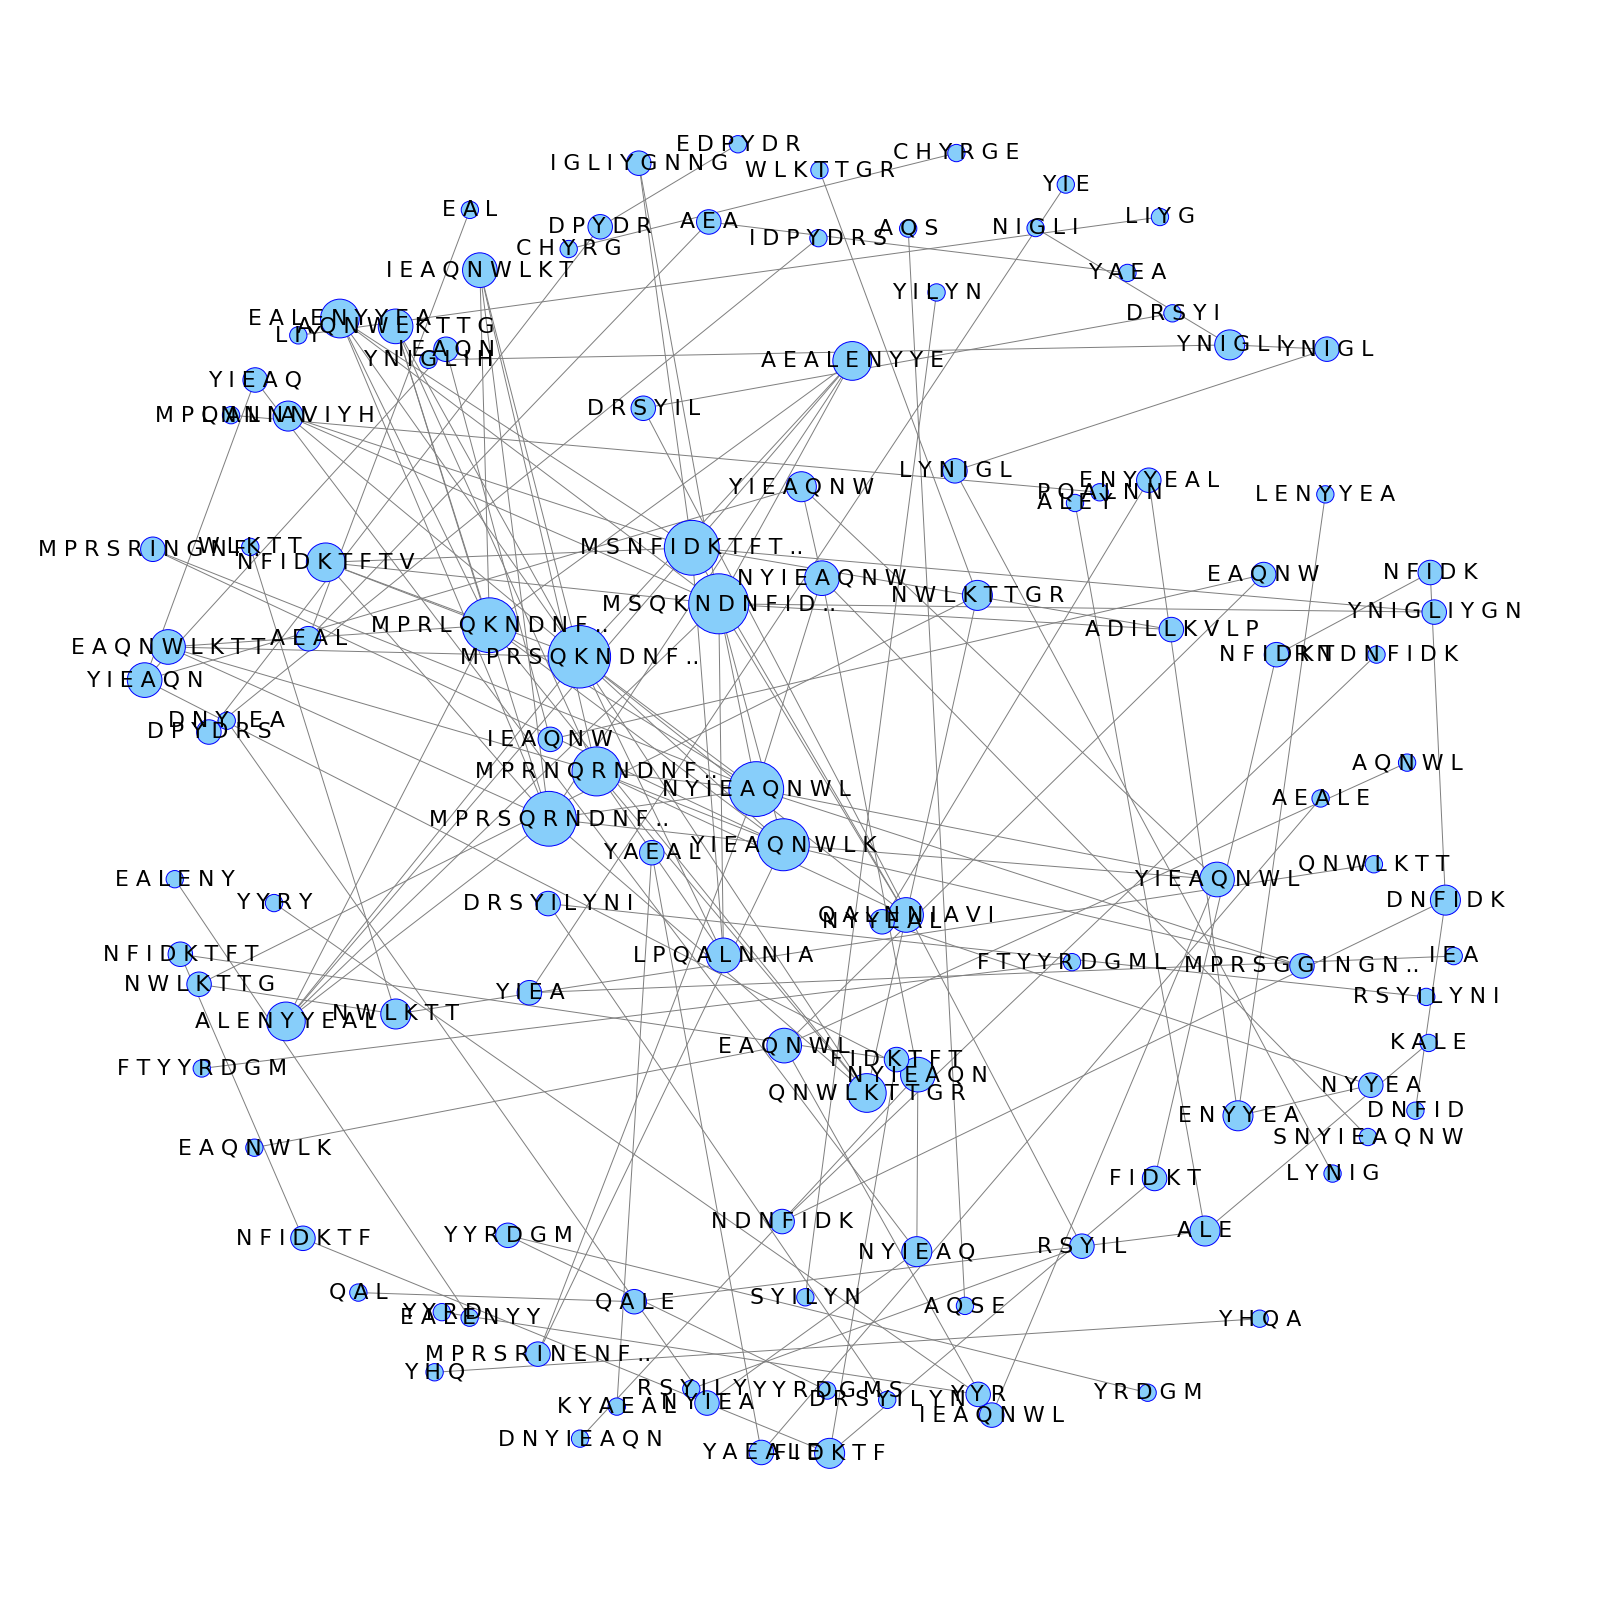

In [9]:
ff = pd.DataFrame(graph_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > 1.5]
build_graph_network(ff)

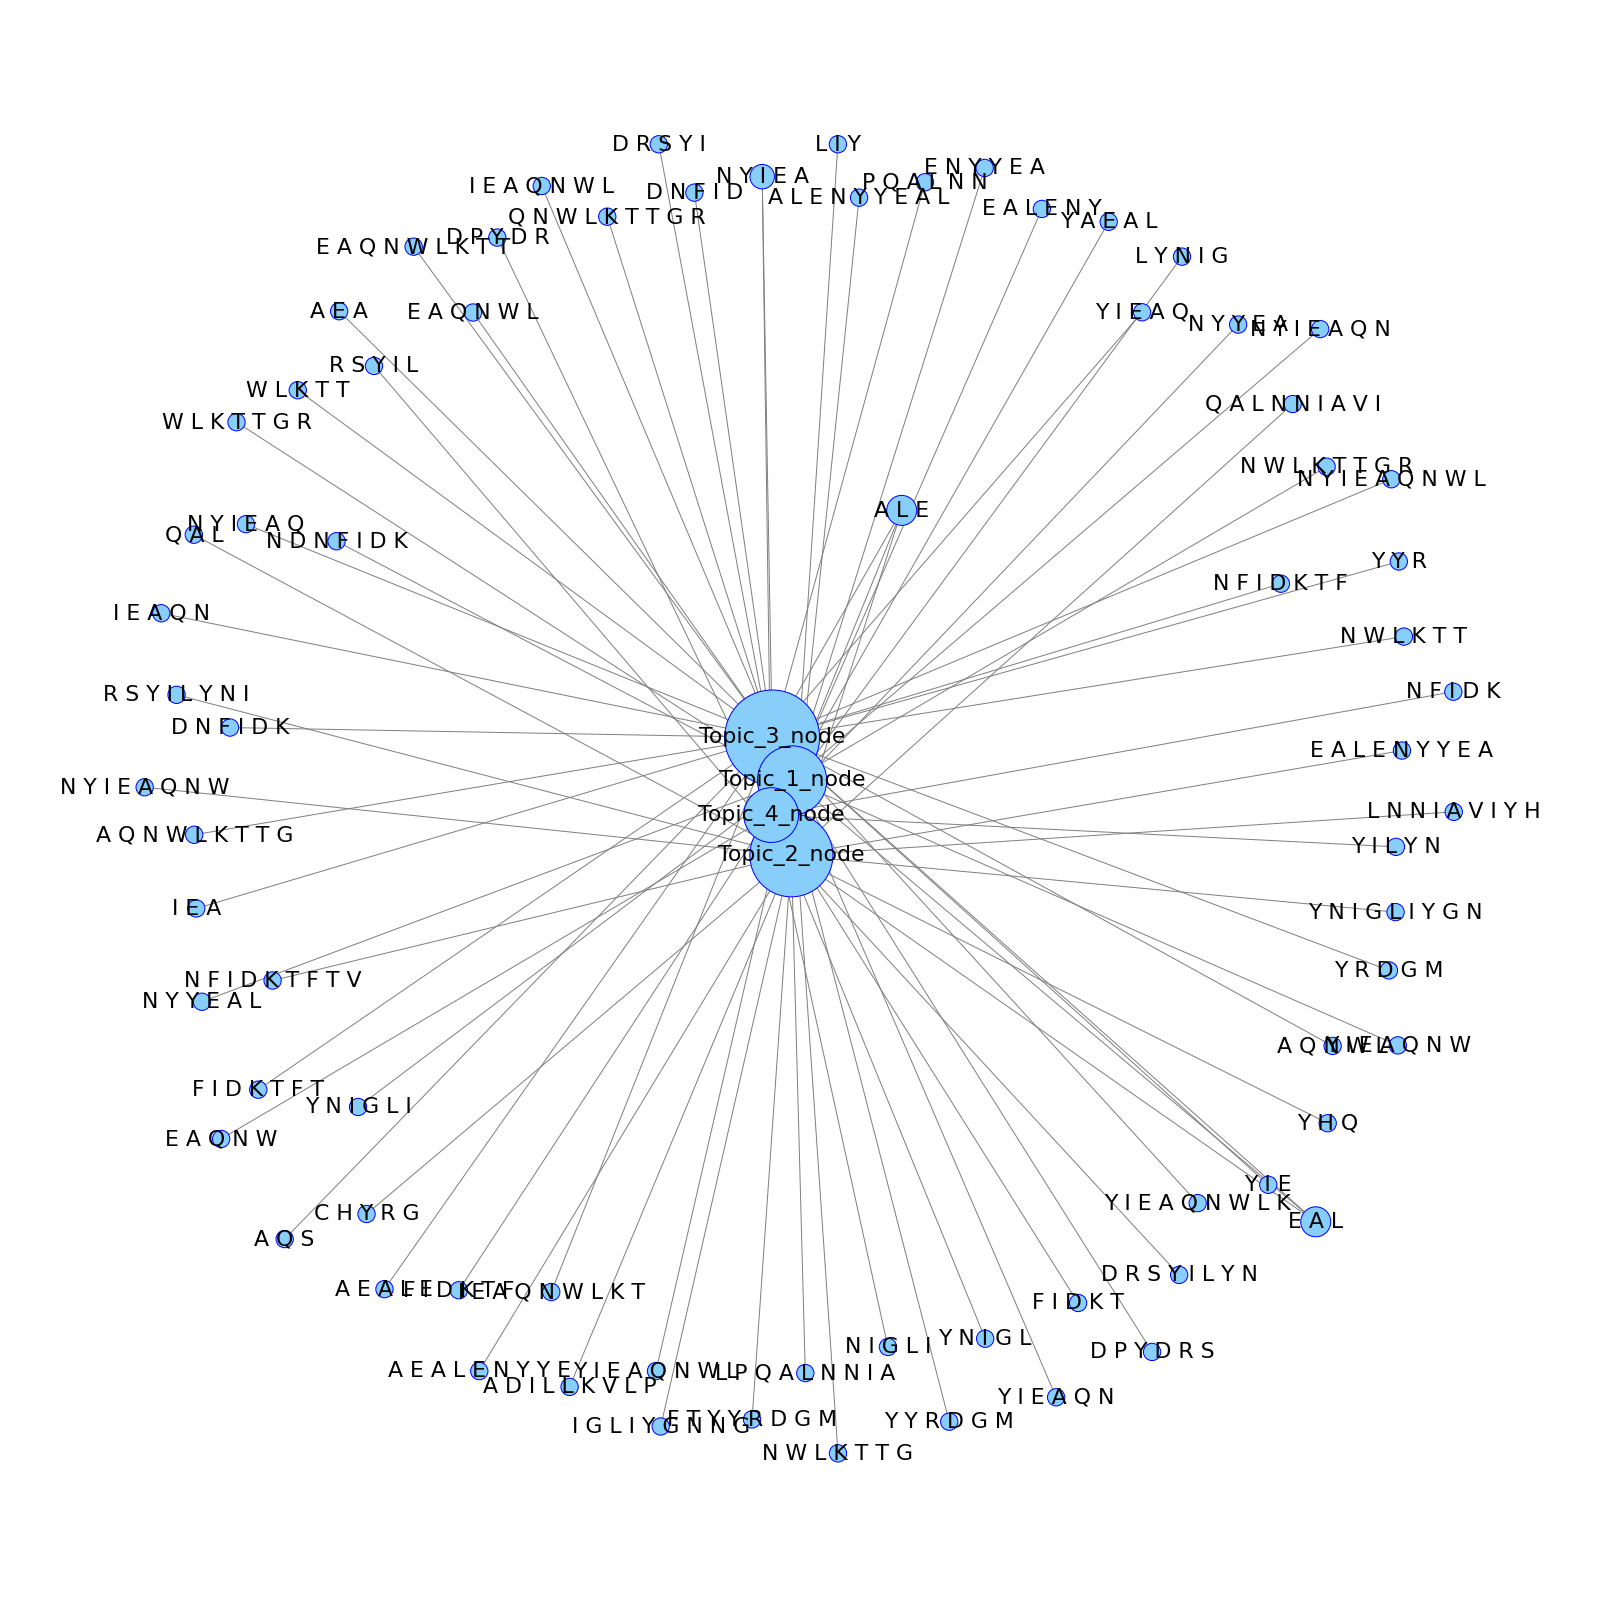

In [10]:
ff = pd.DataFrame(graph_node_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > 1.5]
build_graph_network(ff)

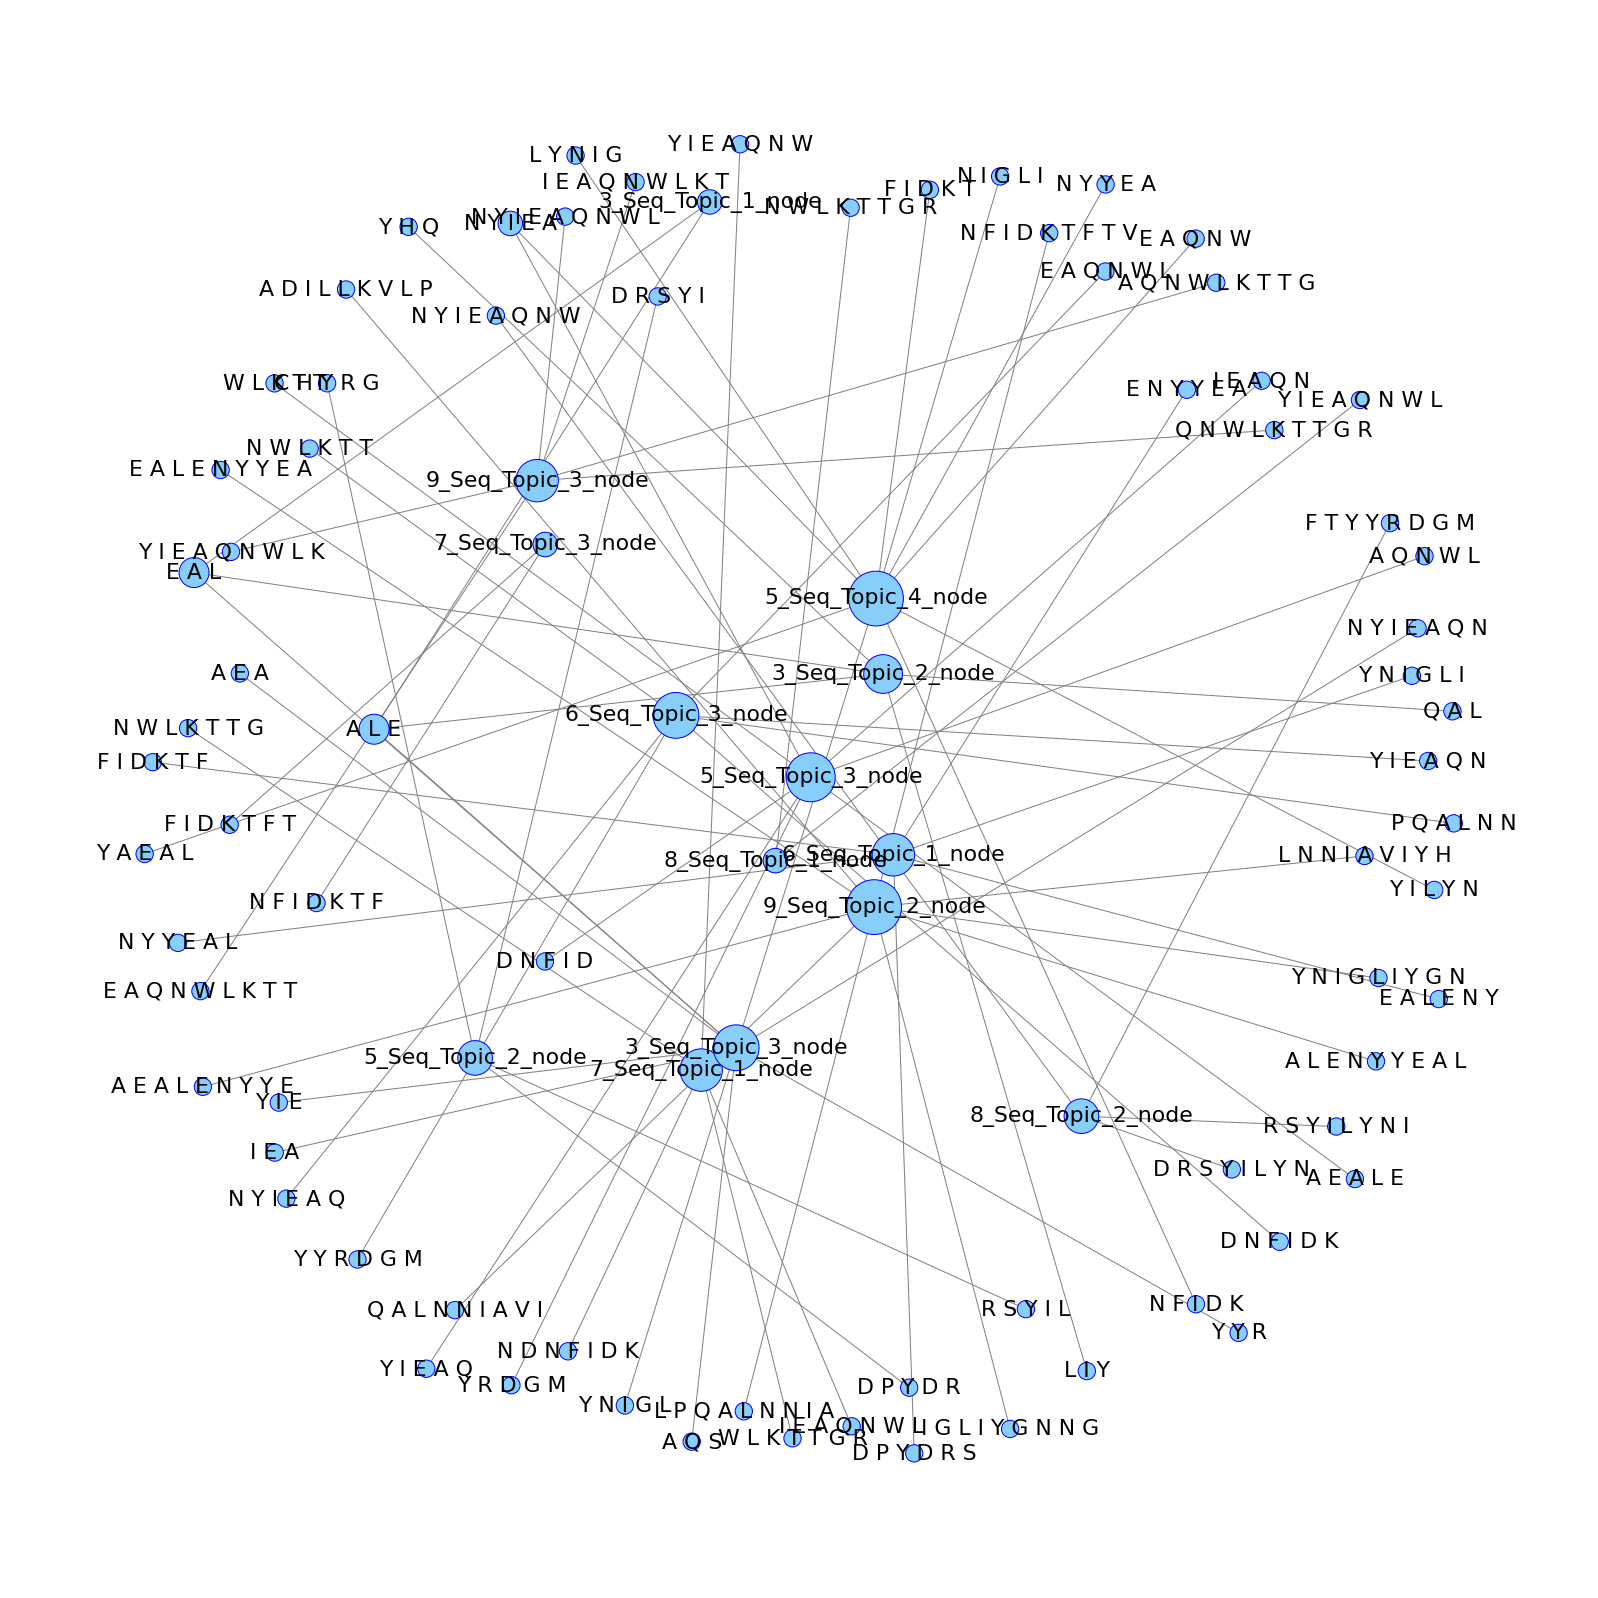

In [11]:
ff = pd.DataFrame(graph_specific_node_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > 1.5]
build_graph_network(ff)

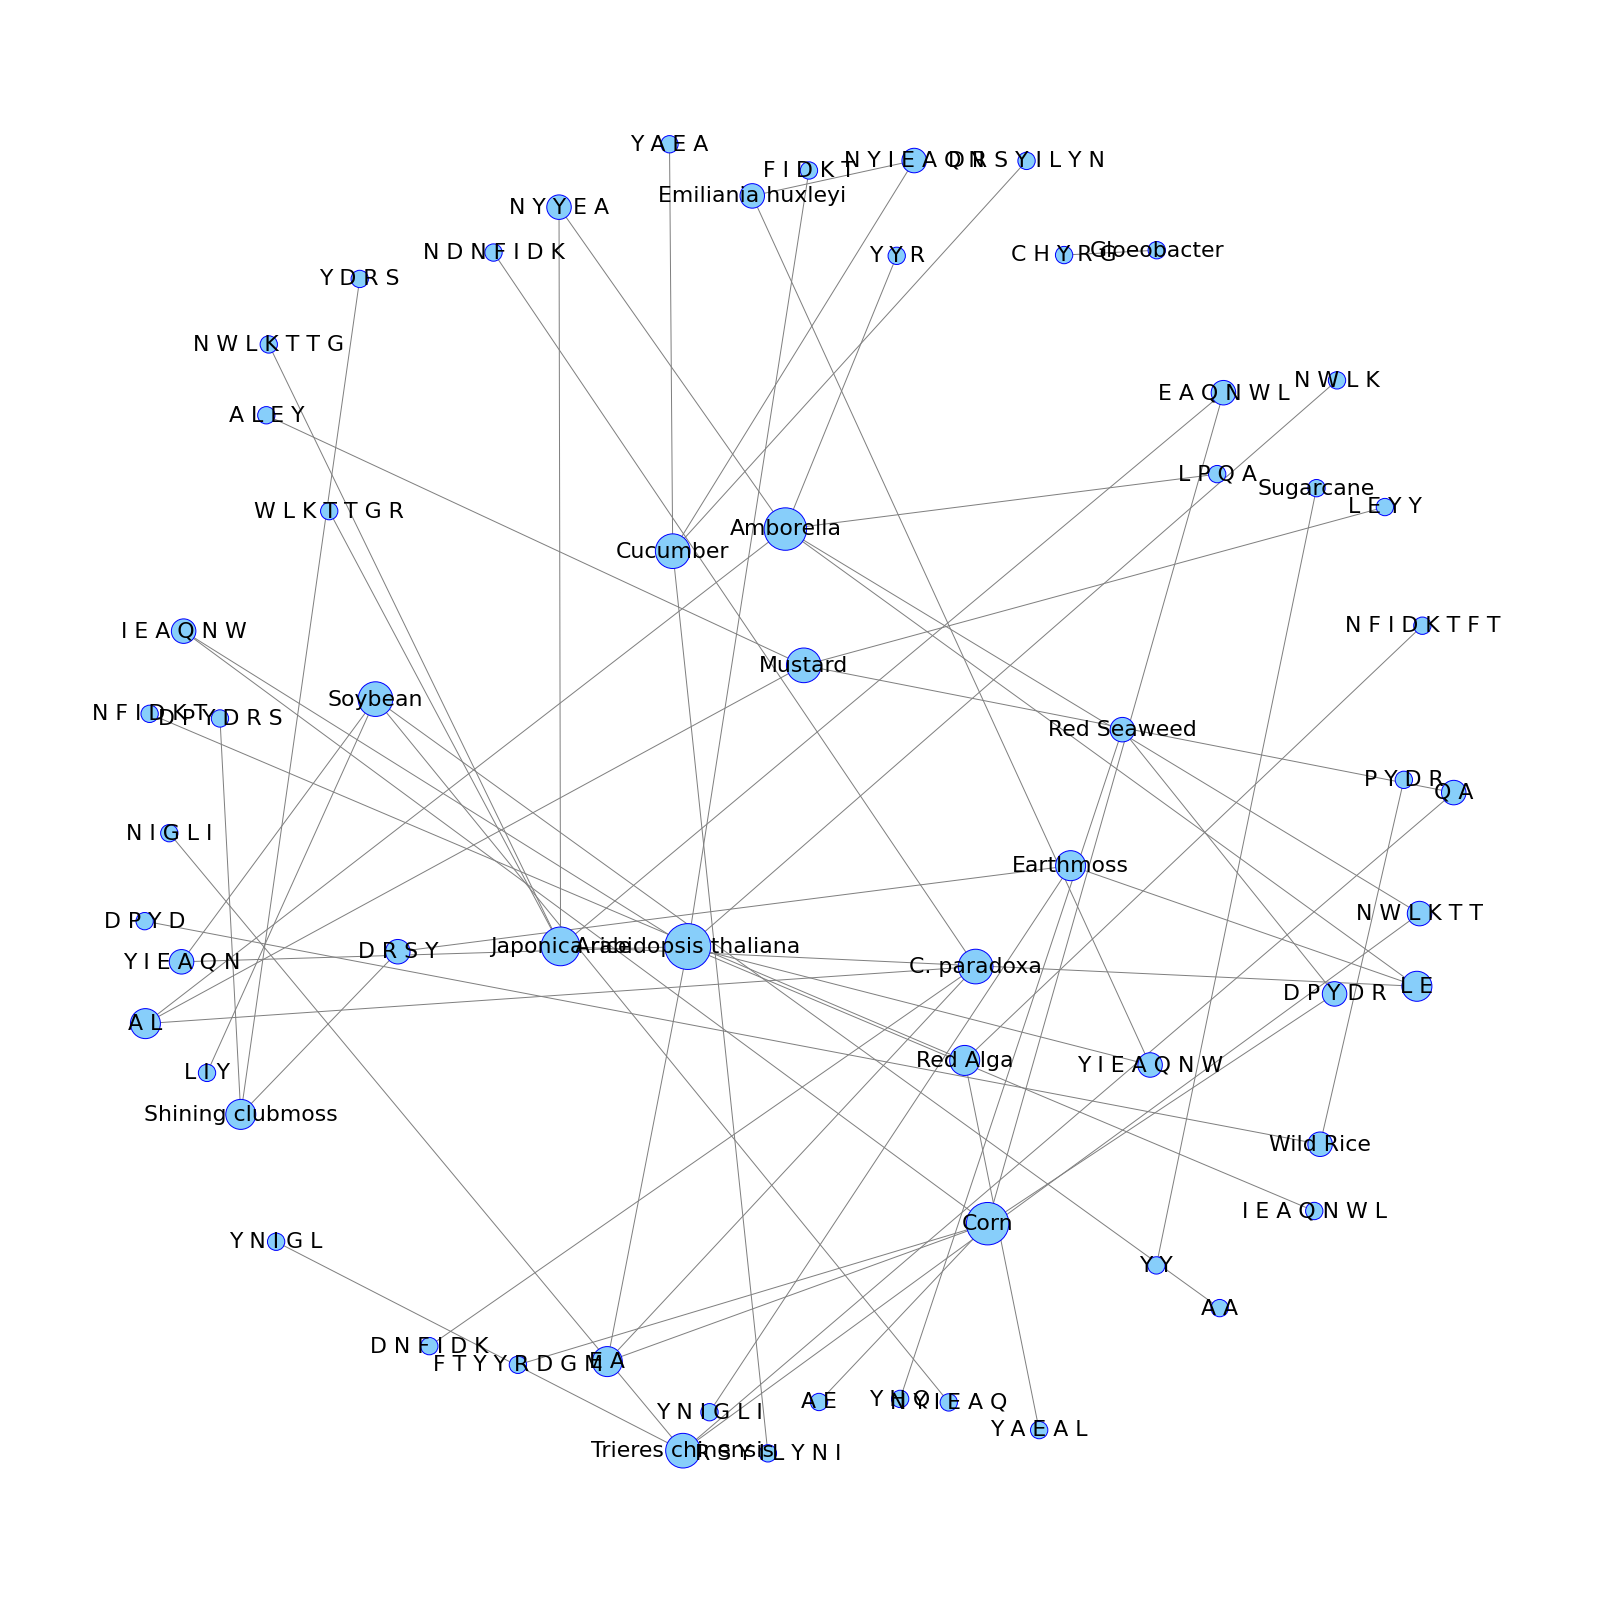

In [24]:
ff = pd.DataFrame(graph_species_generic_node_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > .5]
build_graph_network(ff)
